In [1]:
## 1. Exploratory Data Analysis and Data Cleansing

In [1]:
# importing all the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# loading the dataset
df2012=pd.read_csv('2012_Data.csv', encoding='ISO-8859-1')

C:\Users\Bhavesh\AppData\Local\Temp\ipykernel_13024\396770002.py:2: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df2012=pd.read_csv('2012_Data.csv', encoding='ISO-8859-1')


### 1.1 Exploratory Data Analysis (EDA)

In [4]:
df2012.shape

(1037205, 41)

In [5]:
# Set display option to show standard decimal format
pd.options.display.float_format = '{:,.2f}'.format

# Describe the selected columns
df_selected = df2012[['value_sales', 'value_cost', 'value_quantity']].describe()
print(df_selected)

# Reset the display option if needed
pd.reset_option('display.float_format')


       value_sales   value_cost  value_quantity
count 1,037,205.00 1,037,205.00    1,037,205.00
mean        399.39       251.02           24.97
std       2,729.27     1,759.26          285.47
min    -765,100.00  -141,469.52      -45,000.00
25%          22.88         9.63            2.00
50%          67.00        31.19            6.00
75%         195.94       101.05           20.00
max     765,100.00   329,064.40       66,000.00


In [6]:
#Checking missing values

df2012.isna().sum()

accounting_date                   0
fiscal_year                       0
fiscal_month                      0
calendar_year                     0
calendar_month                    0
calendar_day                      0
company_code                      0
customer_code                     0
customer_district_code            0
item_code                         0
business_area_code                0
item_group_code                   0
item_class_code                   0
item_type                         0
bonus_group_code                  0
environment_group_code            0
technology_group_code             0
commission_group_code             0
reporting_classification          0
light_source                      0
warehouse_code                    0
abc_class_code                    0
abc_class_volume                  0
business_chain_l1_code            0
business_chain_l1_name            0
contact_method_code               0
salesperson_code                  0
order_type_code             

In [7]:
df2012[df2012['item_source_class'].isna()]

accounting_date  fiscal_year  fiscal_month  calendar_year  \
0               20120509         2012            11           2012   
1               20120216         2012             8           2012   
2               20120509         2012            11           2012   
3               20120518         2012            11           2012   
4               20120109         2012             7           2012   
...                  ...          ...           ...            ...   
1037200         20121019         2013             4           2012   
1037201         20121025         2013             4           2012   
1037202         20121025         2013             4           2012   
1037203         20120830         2013             2           2012   
1037204         20121025         2013             4           2012   

         calendar_month  calendar_day  company_code customer_code  \
0                     5             9           101     411800601   
1                     2            16           101     361000403   
2                     5             9           101     361000403   
3                     5            18           101     565540415   
4                     1             9           101     565540415   
...                 ...           ...           ...           ...   
1037200              10            19           205     471150032   
1037201              10            25           205     602100400   
1037202              10            25           205     602100400   
1037203               8            30           205     212005201   
1037204              10            25           205     603400427   

         customer_district_code                       item_code  ...  \
0                           410  GENIE8WWWBC                     ...   
1                           300  GENIE8WWWBC                     ...   
2                           300  GENIE8WWWBC                     ...   
3                           500  GENIE8WWWBC                     ...   
4                           500  GENIE8WWWBC                     ...   
...                         ...                             ...  ...   
1037200                     400                          693380  ...   
1037201                     600                          693380  ...   
1037202                     600                          693380  ...   
1037203                     210                          607222  ...   
1037204                     600                          693380  ...   

        value_quantity value_price_adjustment currency  item_source_class  \
0                 84.0                      0      AUD                NaN   
1                 12.0                      0      AUD                NaN   
2                 12.0                      0      AUD                NaN   
3                  6.0                      0      AUD                NaN   
4                  6.0                      0      AUD                NaN   
...                ...                    ...      ...                ...   
1037200            4.0                      0      AUS                NaN   
1037201           30.0                      0      AUS                NaN   
1037202           20.0                      0      AUS                NaN   
1037203           20.0                      0      AUS                NaN   
1037204           50.0                      0      AUS                NaN   

        invoice_number line_number invoice_date customer_order_number  \
0              2217887           1     20120509               2865354   
1              2185745           1     20120216               2833515   
2              2217807           1     20120509               2864857   
3              2222758           1     20120518               2869759   
4              2170374           1     20120109               2819189   
...                ...         ...          ...                   ...   
1037200         765174           0    

In [8]:
#Looking for unique enteries in technology group code,
technology_group_code= df2012['technology_group_code'].unique().tolist()
technology_group_code

['SYLV                                    ',
 'NA                                      ',
 'PIER                                    ',
 '96',
 '219',
 '92',
 '214',
 '380',
 '102',
 '123',
 '110',
 '98',
 '213',
 '580',
 '108',
 '999',
 '198',
 'SCHR                                    ',
 '82',
 '140',
 '540',
 'AUST                                    ',
 '480',
 '760',
 '460',
 '600',
 '520',
 '998',
 '570',
 '280',
 '330',
 '220',
 '415',
 '340',
 '225',
 'CSE                                     ',
 '565',
 '410',
 '560',
 '800',
 '680',
 '320',
 '550',
 '400',
 '160',
 '440',
 '420',
 '500',
 '555',
 '360',
 '290',
 '780',
 '545',
 '181',
 '240',
 '640',
 '820',
 '595',
 '300',
 '830',
 '70',
 '850',
 '86',
 '720',
 '740',
 '310',
 'FGDFT                                   ',
 '350',
 '206',
 '64',
 'PNZ                                     ',
 '63',
 'CROM                                    ',
 '100',
 '78',
 '207',
 '208',
 '76',
 '211',
 '205',
 '85',
 '90',
 '68',
 '130',
 'GLG   

In [9]:
# Strip whitespace from all entries in the 'technology_group_code' column
df2012['technology_group_code'] = df2012['technology_group_code'].str.strip()


In [10]:
technology_group_code= df2012['technology_group_code'].unique().tolist()
technology_group_code

['SYLV',
 'NA',
 'PIER',
 '96',
 '219',
 '92',
 '214',
 '380',
 '102',
 '123',
 '110',
 '98',
 '213',
 '580',
 '108',
 '999',
 '198',
 'SCHR',
 '82',
 '140',
 '540',
 'AUST',
 '480',
 '760',
 '460',
 '600',
 '520',
 '998',
 '570',
 '280',
 '330',
 '220',
 '415',
 '340',
 '225',
 'CSE',
 '565',
 '410',
 '560',
 '800',
 '680',
 '320',
 '550',
 '400',
 '160',
 '440',
 '420',
 '500',
 '555',
 '360',
 '290',
 '780',
 '545',
 '181',
 '240',
 '640',
 '820',
 '595',
 '300',
 '830',
 '70',
 '850',
 '86',
 '720',
 '740',
 '310',
 'FGDFT',
 '350',
 '206',
 '64',
 'PNZ',
 '63',
 'CROM',
 '100',
 '78',
 '207',
 '208',
 '76',
 '211',
 '205',
 '85',
 '90',
 '68',
 '130',
 'GLG',
 'INLIT',
 '72',
 '61',
 '880',
 '217',
 '215',
 '80',
 '210',
 'INZ',
 '250',
 '118',
 '66']

In [11]:

customer_district_code= df2012['customer_district_code'].unique().tolist()
customer_district_code

[410,
 300,
 500,
 310,
 400,
 200,
 210,
 720,
 710,
 600,
 510,
 530,
 535,
 540,
 520,
 545]

In [12]:
currency= df2012['currency'].unique().tolist()
currency

['AUD', 'USD', 'AUS', 'NZD', '   ', 'EUR']

In [13]:
empty_rows = df2012[df2012['currency'] == '   ']['currency']
empty_rows

506531       
Name: currency, dtype: object

In [14]:
# Remove rows where 'currency' column has blank spaces
df2012 = df2012[df2012['currency'].str.strip() != '']

# Verify the unique values to confirm the blank entries are removed
currency = df2012['currency'].unique().tolist()
currency

['AUD', 'USD', 'AUS', 'NZD', 'EUR']

In [15]:
# Safely replace 'AUS' with 'AUD' in the 'currency' column using .loc[]
df2012.loc[df2012['currency'] == 'AUS', 'currency'] = 'AUD'

# Verify the unique values to confirm the replacement
currency = df2012['currency'].unique().tolist()
currency


['AUD', 'USD', 'NZD', 'EUR']

In [16]:
business_area_code= df2012['business_area_code'].unique().tolist()
business_area_code

['LMP                           ',
 'FLD                           ',
 'OTH                           ',
 'SUR                           ',
 'COM                           ',
 'DLT                           ',
 'TRO                           ',
 'URB                           ',
 'HLB                           ',
 'SAE                           ',
 'RWY                           ',
 'LCP                           ',
 'PEN                           ',
 'EXL                           ',
 'TAL                           ',
 '945',
 '950',
 '980',
 '920',
 '960',
 '910',
 '930',
 '999',
 '970',
 '940',
 '985',
 'IAE                           ',
 'IAI                           ']

In [17]:
# Safely remove whitespace from the 'business_area_code' column using .loc[]
df2012.loc[:, 'business_area_code'] = df2012['business_area_code'].str.strip()

# Display unique values to verify the whitespace removal
business_area_code = df2012['business_area_code'].unique().tolist()
business_area_code

['LMP',
 'FLD',
 'OTH',
 'SUR',
 'COM',
 'DLT',
 'TRO',
 'URB',
 'HLB',
 'SAE',
 'RWY',
 'LCP',
 'PEN',
 'EXL',
 'TAL',
 '945',
 '950',
 '980',
 '920',
 '960',
 '910',
 '930',
 '999',
 '970',
 '940',
 '985',
 'IAE',
 'IAI']

In [18]:
#Looking for error or typo in column environment_group_code
business_area_code= df2012['business_area_code'].unique().tolist()
df2012['business_area_code'].unique().tolist()

['LMP',
 'FLD',
 'OTH',
 'SUR',
 'COM',
 'DLT',
 'TRO',
 'URB',
 'HLB',
 'SAE',
 'RWY',
 'LCP',
 'PEN',
 'EXL',
 'TAL',
 '945',
 '950',
 '980',
 '920',
 '960',
 '910',
 '930',
 '999',
 '970',
 '940',
 '985',
 'IAE',
 'IAI']

In [19]:
#Looking for error or typo in column environment_group_code
environment_group_code= df2012['environment_group_code'].unique().tolist()
environment_group_code

['S                             ',
 'P                             ',
 'D                             ',
 'Z                             ',
 'C                             ',
 'M                             ',
 'R                             ',
 'I                             ',
 'NA                            ']

In [20]:
# Safely remove whitespace from the 'business_area_code' column using .loc[]
df2012.loc[:, 'environment_group_code'] = df2012['environment_group_code'].str.strip()

# Display unique values to verify the whitespace removal
environment_group_code = df2012['environment_group_code'].unique().tolist()
environment_group_code

['S', 'P', 'D', 'Z', 'C', 'M', 'R', 'I', 'NA']

In [21]:
#Looking for error or typo in column abc_class_code
abc_class_code= df2012['abc_class_code'].unique().tolist()
abc_class_code

['J', 'B', 'D', 'E', 'C', 'I', 'A', 'F', 'U', 'G']

In [22]:
#Looking for error or typo in column abc_class_volume
abc_class_volume= df2012['abc_class_volume'].unique().tolist()
abc_class_volume

['J', 'U', 'D', 'I', 'C', 'E', 'G', 'B', 'A', 'H']

In [23]:
df2012.dtypes

accounting_date               int64
fiscal_year                   int64
fiscal_month                  int64
calendar_year                 int64
calendar_month                int64
calendar_day                  int64
company_code                  int64
customer_code                object
customer_district_code        int64
item_code                    object
business_area_code           object
item_group_code              object
item_class_code              object
item_type                     int64
bonus_group_code             object
environment_group_code       object
technology_group_code        object
commission_group_code        object
reporting_classification     object
light_source                 object
warehouse_code               object
abc_class_code               object
abc_class_volume             object
business_chain_l1_code       object
business_chain_l1_name       object
contact_method_code          object
salesperson_code             object
order_type_code             

### 1.4 Data Type conversion

In [24]:
# Changing the dateformat 

df2012['invoice_date'] = pd.to_datetime(df2012['invoice_date'].astype(str), format='%Y%m%d')
df2012['order_date'] = pd.to_datetime(df2012['order_date'].astype(str), format='%Y%m%d')

In [25]:
## check for duplicates.

# code to identify the duplicate values in the invoice_no field
sales_duplicates = df2012['invoice_number'].duplicated(keep=False)
duplicate_rows = df2012[sales_duplicates]

In [26]:
duplicate_rows[duplicate_rows['invoice_number'] == 754718]

accounting_date  fiscal_year  fiscal_month  calendar_year  \
569018          20120830         2013             2           2012   
582855          20120830         2013             2           2012   
663104          20120830         2013             2           2012   
663613          20120830         2013             2           2012   
663856          20120830         2013             2           2012   
780367          20120830         2013             2           2012   
986714          20120830         2013             2           2012   
1037203         20120830         2013             2           2012   

         calendar_month  calendar_day  company_code customer_code  \
569018                8            30           205     212005201   
582855                8            30           205     212005201   
663104                8            30           205     212005201   
663613                8            30           205     212005201   
663856                8            30           205     212005201   
780367                8            30           205     212005201   
986714                8            30           205     212005201   
1037203               8            30           205     212005201   

         customer_district_code                       item_code  ...  \
569018                      210                          200760  ...   
582855                      210                          200769  ...   
663104                      210  603016ER                        ...   
663613                      210  603304ER                        ...   
663856                      210  603303ER                        ...   
780367                      210                          200763  ...   
986714                      210                          200766  ...   
1037203                     210                          607222  ...   

        value_quantity value_price_adjustment currency  item_source_class  \
569018            25.0                      0      AUD                NaN   
582855            25.0                      0      AUD                NaN   
663104            20.0                      0      AUD                NaN   
663613            30.0                      0      AUD                NaN   
663856            30.0                      0      AUD                NaN   
780367            25.0                      0      AUD                NaN   
986714            50.0                      0      AUD                NaN   
1037203           20.0                      0      AUD                NaN   

        invoice_number line_number invoice_date customer_order_number  \
569018          754718           0   2012-08-30               1429218   
582855          754718           0   2012-08-30               1429218   
663104          754718           0   2012-08-30               1429218   
663613          754718           0   2012-08-30               1429218   
663856          754718           0   2012-08-30               1429218   
780367          754718           0   2012-08-30               1429218   
986714          754718           0   2012-08-30               1429218   
1037203         754718           0   2012-08-30               1429218   

        order_date dss_update_time  
569018  2012-08-30         49:58.7  
582855  2012-08-30         49:58.7  
663104  2012-08-30         49:58.7  
663613  2012-08-30         49:58.7  
663856  2012-08-30         49:58.7  
780367  2012-08-30         49:58.7  
986714  2012-08-30         49:58.7  
1037203 2012-08-30         49:58.7  

[8 rows x 41 columns]

### Outlier treatment 

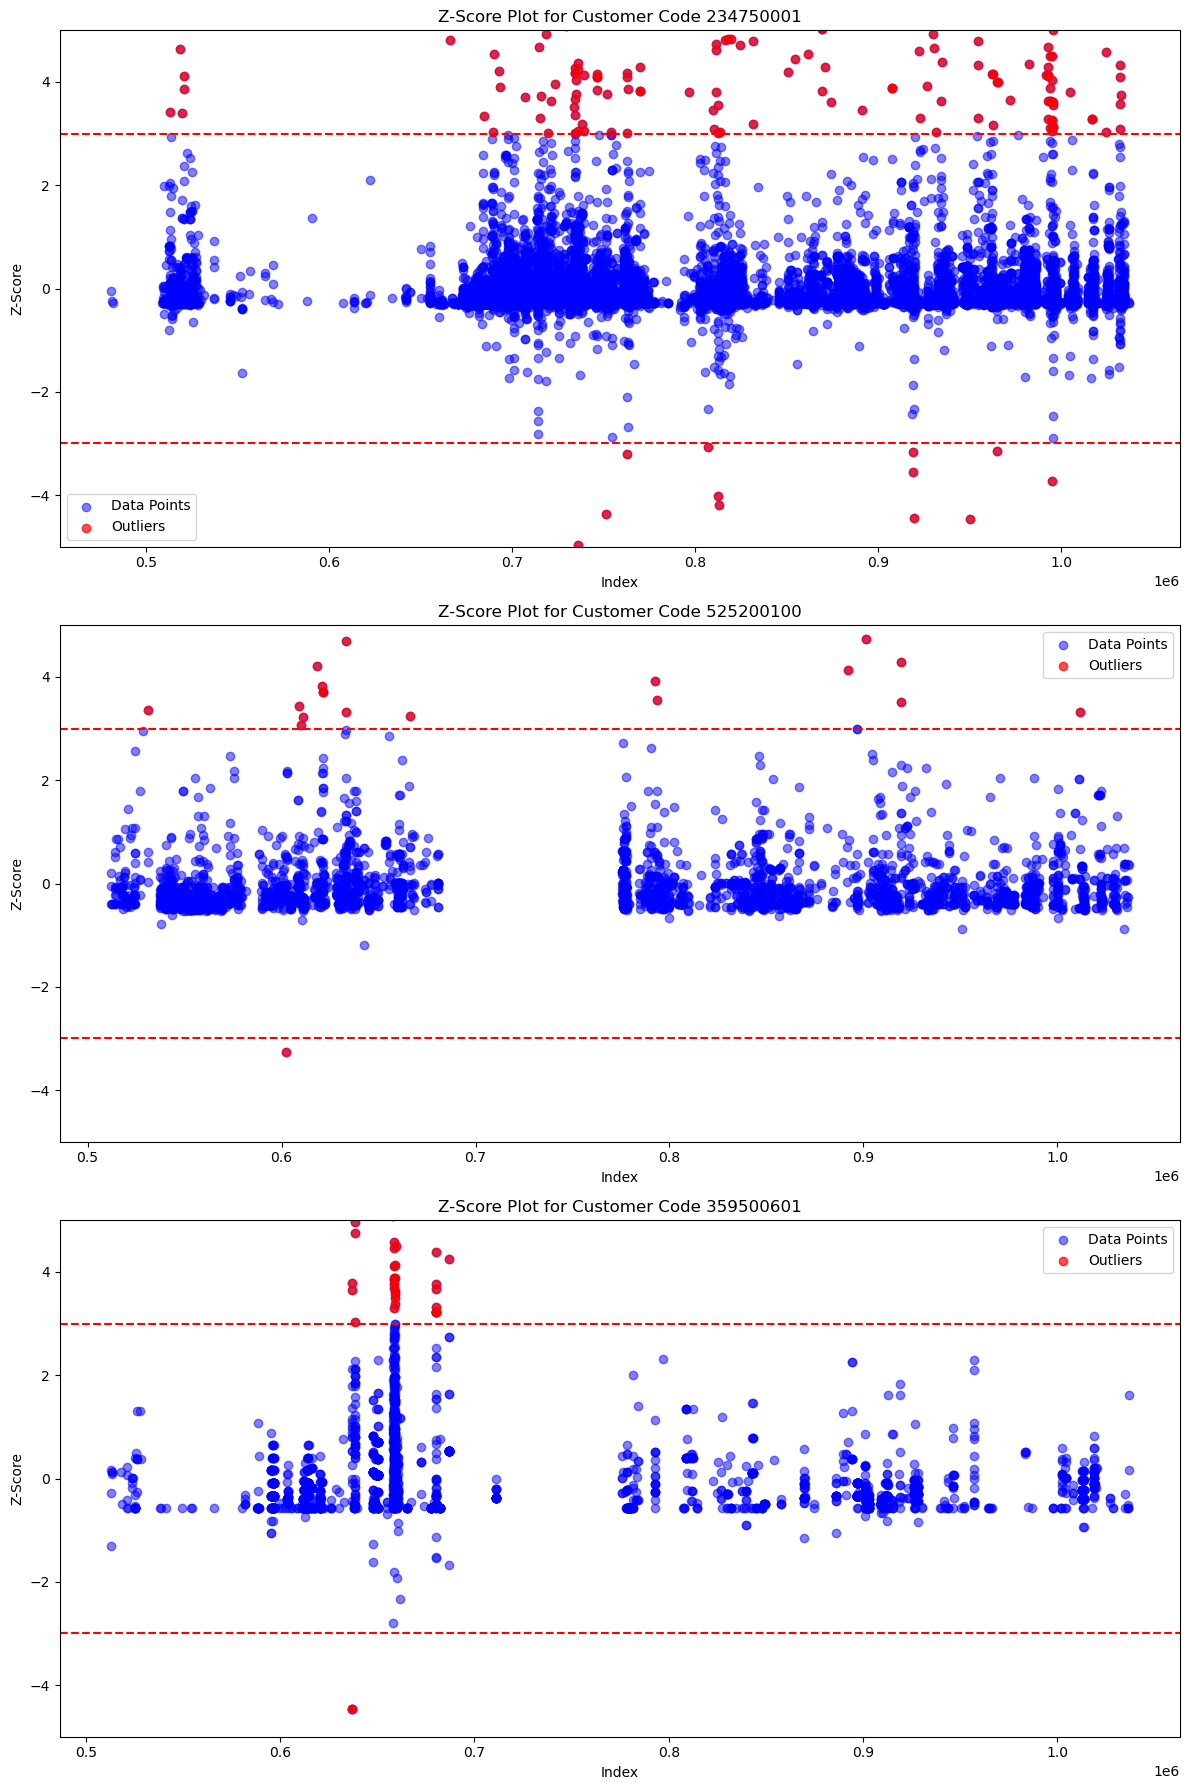

In [27]:


# Define the threshold for Z-score outliers
threshold = 3

# List of specific customer codes to analyze
selected_customers = ['234750001', '525200100', '359500601']

# Create subplots
plt.figure(figsize=(12, 18))

# Loop through each selected customer and plot Z-score analysis
for i, customer in enumerate(selected_customers, 1):
    # Filter data for the current customer and create a copy to avoid SettingWithCopyWarning
    customer_data = df2012[df2012['customer_code'] == customer].copy()
    
    # Calculate mean and standard deviation for value_sales within this customer group
    mean = customer_data['value_sales'].mean()
    std = customer_data['value_sales'].std()
    
    # Calculate Z-scores for value_sales in the current group using .loc
    customer_data.loc[:, 'z_score'] = (customer_data['value_sales'] - mean) / std
    
    # Identify outliers
    outliers = customer_data[np.abs(customer_data['z_score']) > threshold]
    
    # Plot Z-scores
    plt.subplot(3, 1, i)  # 3 rows, 1 column, ith subplot
    plt.scatter(customer_data.index, customer_data['z_score'], color='blue', alpha=0.5, label='Data Points')
    plt.scatter(outliers.index, outliers['z_score'], color='red', alpha=0.7, label='Outliers')
    
    # Plot threshold lines
    plt.axhline(threshold, color='red', linestyle='--', linewidth=1.5)
    plt.axhline(-threshold, color='red', linestyle='--', linewidth=1.5)
    
    # Add titles and labels
    plt.title(f'Z-Score Plot for Customer Code {customer}')
    plt.xlabel('Index')
    plt.ylabel('Z-Score')
    plt.ylim(-5, 5)
    plt.legend()

plt.tight_layout()
plt.show()


In [28]:

# List to hold cleaned data
cleaned_data = []

# Loop through each unique customer_code to apply Z-score outlier treatment
for customer in df2012['customer_code'].unique():
    # Filter data for the current customer
    customer_data = df2012[df2012['customer_code'] == customer].copy()  # Use .copy() to avoid SettingWithCopyWarning
    
    # Calculate mean and standard deviation for value_sales within this customer group
    mean = customer_data['value_sales'].mean()
    std = customer_data['value_sales'].std()
    threshold = 3  # Z-score threshold
    
    # Calculate Z-scores for value_sales in the current group
    customer_data.loc[:, 'z_score'] = (customer_data['value_sales'] - mean) / std  # Use .loc[] to avoid warning
    
    # Filter out outliers based on the threshold
    customer_data_cleaned = customer_data[np.abs(customer_data['z_score']) <= threshold]
    
    # Append cleaned data to the list
    cleaned_data.append(customer_data_cleaned)

# Concatenate all cleaned customer data into a single DataFrame
df_clean2012 = pd.concat(cleaned_data, ignore_index=True)

# Display the cleaned data
print(df_clean2012[['customer_code', 'value_sales', 'z_score']])



        customer_code  value_sales   z_score
0           411800601       218.40 -0.085515
1           411800601       153.12 -0.116477
2           411800601       201.00 -0.093768
3           411800601       191.40 -0.098321
4           411800601       402.00  0.001566
...               ...          ...       ...
1017950     405601201       300.00  0.707107
1017951     301200100      -145.00 -1.173032
1017952     301200100      4924.20 -0.364969
1017953     301200100     14500.00  1.161475
1017954     301200100      9575.80  0.376526

[1017955 rows x 3 columns]


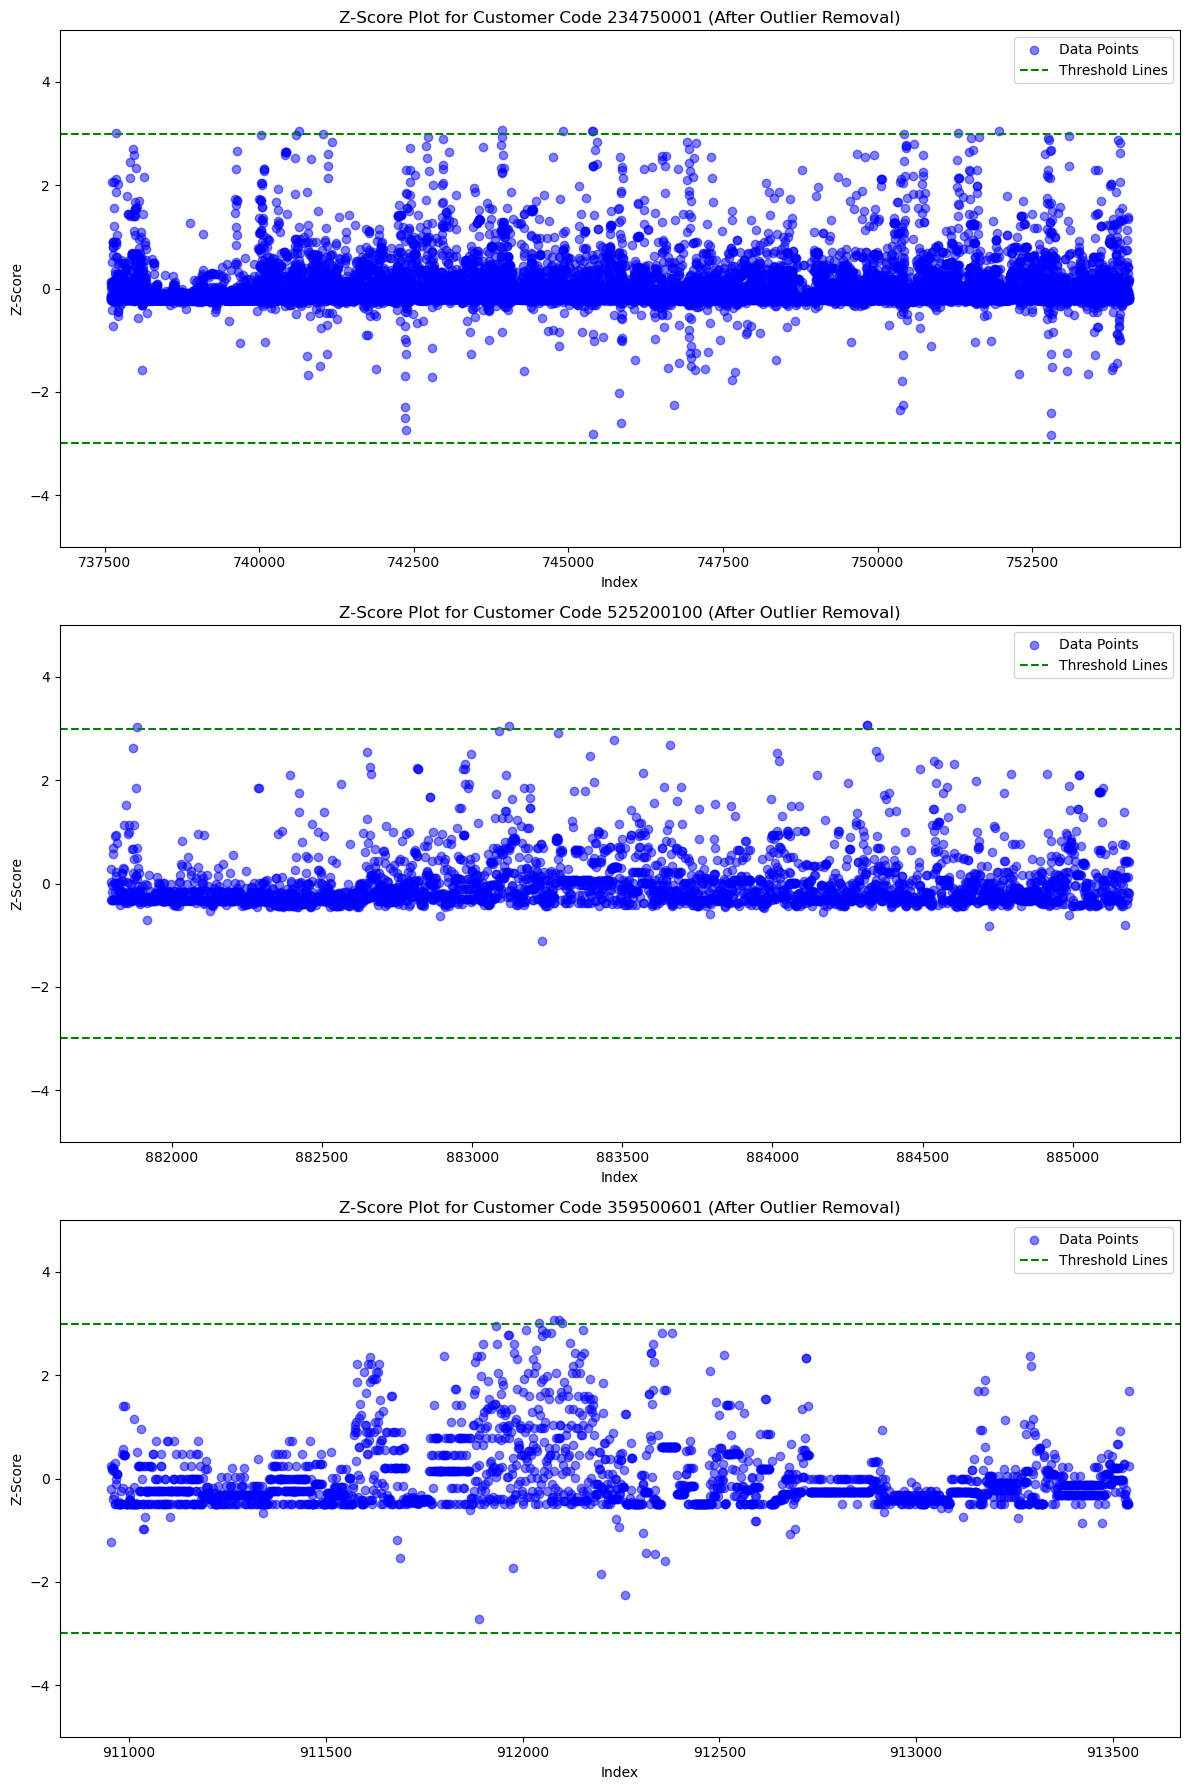

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Define the Z-score threshold
threshold = 3

# List of specific customer codes to analyze
selected_customers = ['234750001', '525200100', '359500601']

# Loop through each selected customer and plot Z-score analysis
plt.figure(figsize=(12, 18))

for i, customer in enumerate(selected_customers, 1):
    customer_data = df2012[df2012['customer_code'] == customer].copy()
    # Filter data for the current customer after removing outliers and create a copy to avoid warnings
    customer_data_cleaned = df_clean2012[df_clean2012['customer_code'] == customer].copy()
    
    # Calculate mean and std for the cleaned data of the specific customer
    mean = customer_data_cleaned['value_sales'].mean()
    std = customer_data['value_sales'].std()
    
    # Calculate Z-scores for the cleaned data in the current customer group
    customer_data_cleaned.loc[:, 'z_score'] = (customer_data_cleaned['value_sales'] - mean) / std
    
    # Plot Z-scores
    plt.subplot(3, 1, i)  # 3 rows, 1 column, ith subplot
    plt.scatter(customer_data_cleaned.index, customer_data_cleaned['z_score'], color='blue', alpha=0.5, label='Data Points')
    
    # Plot threshold lines
    plt.axhline(threshold, color='green', linestyle='--', linewidth=1.5, label='Threshold Lines')
    plt.axhline(-threshold, color='green', linestyle='--', linewidth=1.5)
    
    # Add titles and labels
    plt.title(f'Z-Score Plot for Customer Code {customer} (After Outlier Removal)')
    plt.xlabel('Index')
    plt.ylabel('Z-Score')
    plt.ylim(-5, 5)
    plt.legend()

plt.tight_layout()
plt.show()


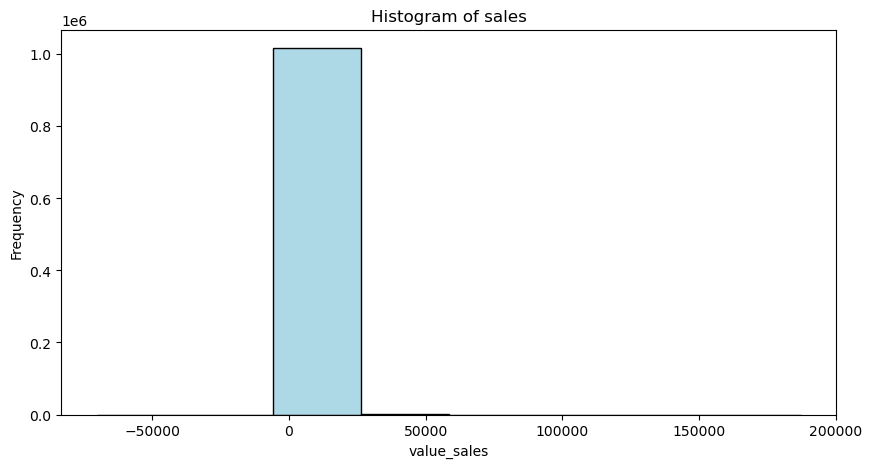

value_sales: 21.678972827080333


In [30]:
## Checking skewness---Value sales
# plotting a histogram of age data
plt.figure(figsize = (10, 5))
plt.hist(df_clean2012['value_sales'], bins = 8, color = 'lightblue', edgecolor = 'black')
plt.title('Histogram of sales')
plt.xlabel('value_sales')
plt.ylabel('Frequency')
plt.show()

value_sales_skew =df_clean2012['value_sales'].skew()
print('value_sales:',value_sales_skew)

In [31]:
#log transformation
df_clean2012['value_sales_log'] = np.log1p(df_clean2012['value_sales'].clip(lower=0))


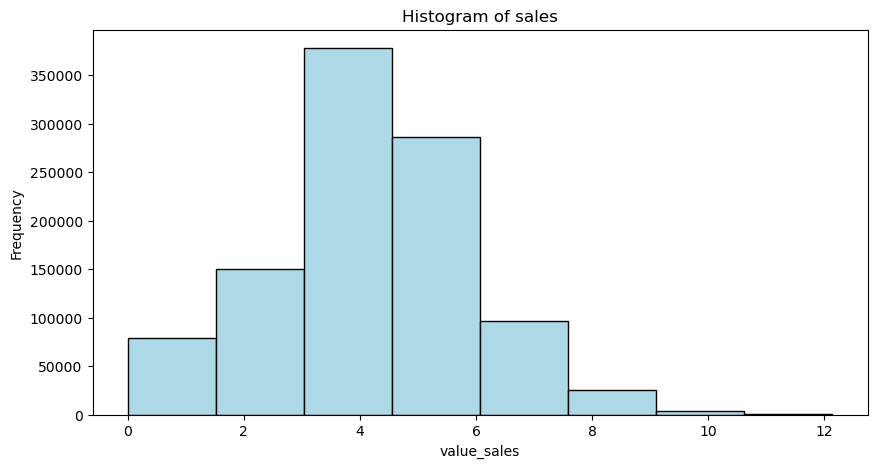

value_sales_log: -0.24908448920349943


In [32]:

# plotting a histogram of age data
plt.figure(figsize = (10, 5))
plt.hist(df_clean2012['value_sales_log'], bins = 8, color = 'lightblue', edgecolor = 'black')
plt.title('Histogram of sales')
plt.xlabel('value_sales')
plt.ylabel('Frequency')
plt.show()

value_sales_skew =df_clean2012['value_sales_log'].skew()
print('value_sales_log:',value_sales_skew)

In [33]:
# Count the number of values greater than 0 in the 'value_adjustment' column
count_positive_value_adjustment = df_clean2012[df_clean2012['value_price_adjustment'] > 0].shape[0]

# Display the result
print("Number of values greater than 0 in 'value_price_adjustment':", count_positive_value_adjustment)


Number of values greater than 0 in 'value_price_adjustment': 26400


In [34]:
# Count the number of zero values in the 'value_price_adjustment' column
count_zero_value_adjustment = (df_clean2012['value_price_adjustment'] == 0).sum()

# Display the result
print("Number of zero values in 'value_price_adjustment':", count_zero_value_adjustment)


Number of zero values in 'value_price_adjustment': 991555


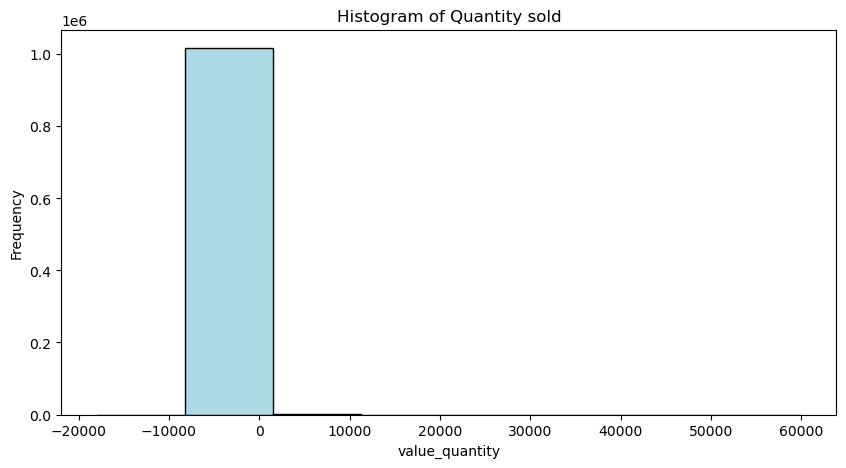

value_quantity: 125.36952940377425


In [35]:
## Checking skewness----Quantity sold

# plotting a histogram of age data
plt.figure(figsize = (10, 5))
plt.hist(df_clean2012['value_quantity'], bins = 8, color = 'lightblue', edgecolor = 'black')
plt.title('Histogram of Quantity sold')
plt.xlabel('value_quantity')
plt.ylabel('Frequency')
plt.show()

value_quantity_skew =df_clean2012['value_quantity'].skew()
print('value_quantity:',value_quantity_skew)

In [36]:
df_clean2012['value_quantity_log'] = np.log1p(df_clean2012['value_quantity'].clip(lower=0))

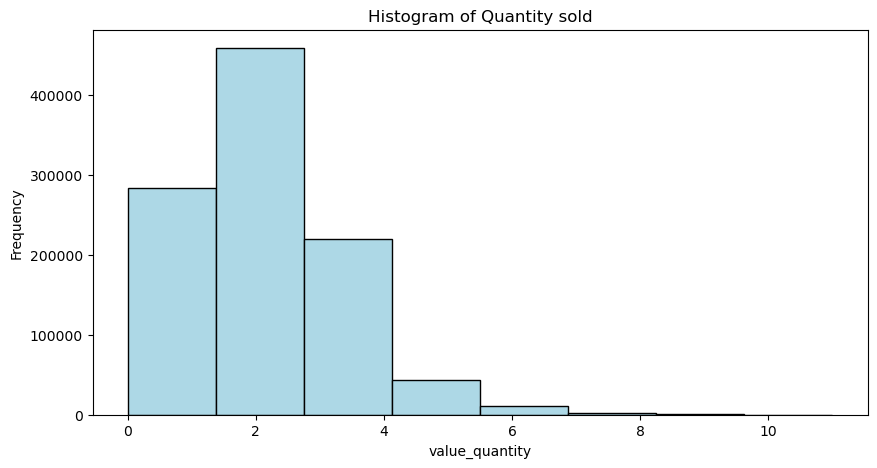

value_quantity_log: 0.6361729164769956


In [37]:

# plotting a histogram of age data
plt.figure(figsize = (10, 5))
plt.hist(df_clean2012['value_quantity_log'], bins = 8, color = 'lightblue', edgecolor = 'black')
plt.title('Histogram of Quantity sold')
plt.xlabel('value_quantity')
plt.ylabel('Frequency')
plt.show()

value_quantity_skew =df_clean2012['value_quantity_log'].skew()
print('value_quantity_log:',value_quantity_skew)

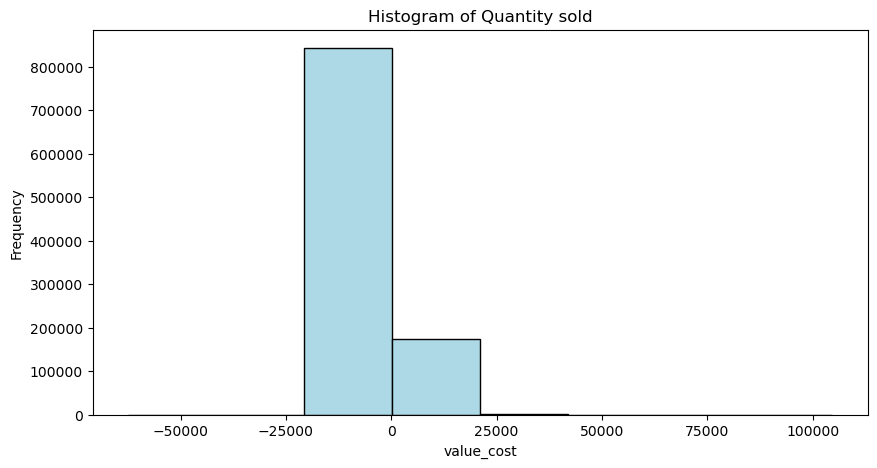

value_cost: 20.66763927511343


In [38]:
## Checking skewness---Quantity sold

# plotting a histogram of age data
plt.figure(figsize = (10, 5))
plt.hist(df_clean2012['value_cost'], bins = 8, color = 'lightblue', edgecolor = 'black')
plt.title('Histogram of Quantity sold')
plt.xlabel('value_cost')
plt.ylabel('Frequency')
plt.show()

value_cost_skew =df_clean2012['value_cost'].skew()
print('value_cost:',value_cost_skew)

In [39]:
df_clean2012['value_cost_log'] = np.log1p(df_clean2012['value_cost'].clip(lower=0))

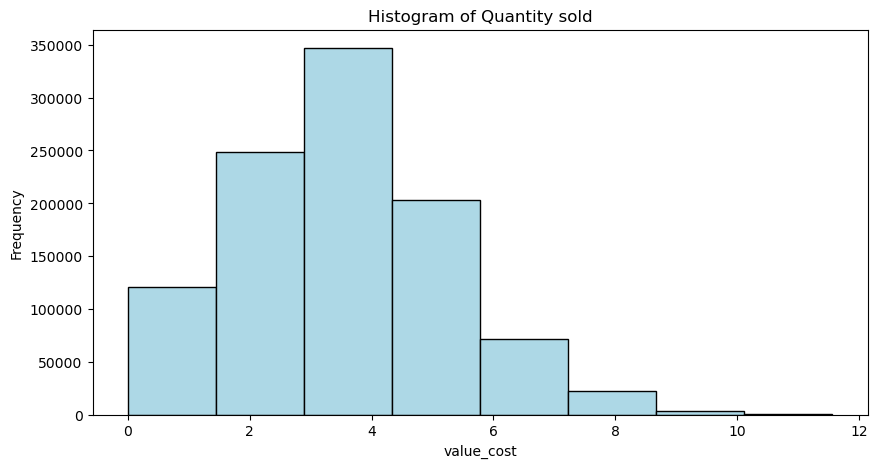

value_cost_log: 0.2063845934452549


In [40]:
# plotting a histogram of age data
plt.figure(figsize = (10, 5))
plt.hist(df_clean2012['value_cost_log'], bins = 8, color = 'lightblue', edgecolor = 'black')
plt.title('Histogram of Quantity sold')
plt.xlabel('value_cost')
plt.ylabel('Frequency')
plt.show()

value_cost_skew =df_clean2012['value_cost_log'].skew()
print('value_cost_log:',value_cost_skew)

# Data cleaning of year_2013

In [41]:
# loading the dataset
df2013=pd.read_csv('2013_Data.csv', encoding='ISO-8859-1')

C:\Users\Bhavesh\AppData\Local\Temp\ipykernel_13024\4179859581.py:2: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df2013=pd.read_csv('2013_Data.csv', encoding='ISO-8859-1')


In [42]:
df2013.head()

accounting_date  fiscal_year  fiscal_month  calendar_year  calendar_month  \
0         20130125         2013             7           2013               1   
1         20130513         2013            11           2013               5   
2         20130611         2013            12           2013               6   
3         20130111         2013             7           2013               1   
4         20130321         2013             9           2013               3   

   calendar_day  company_code customer_code  customer_district_code item_code  \
0            25           205     471150112                     400     10311   
1            13           205     277000801                     200     10311   
2            11           205     292314701                     200     10350   
3            11           205     299480703                     200     10350   
4            21           205     471150015                     400     10364   

   ... value_quantity value_price_adjustment currency  item_source_class  \
0  ...           -1.0                      0      AUD                NaN   
1  ...            1.0                      0      AUD                NaN   
2  ...            2.0                      0      AUD                NaN   
3  ...            1.0                      0      AUD                NaN   
4  ...            6.0                      0      AUD                NaN   

  invoice_number line_number invoice_date customer_order_number order_date  \
0         277995           0     20130125                277995   20130125   
1         749295           0     20130513                867468   20130510   
2         756507           0     20130611                880839   20130611   
3         724149           0     20130111                821554   20130111   
4         738377           0     20130321                847171   20130320   

  dss_update_time  
0         49:58.7  
1         49:58.7  
2         49:58.7  
3         49:58.7  
4         49:58.7  

[5 rows x 41 columns]

In [43]:
df2013.shape

(951177, 41)

In [44]:
# Set display option to show standard decimal format
pd.options.display.float_format = '{:,.2f}'.format

# Describe the selected columns
df_selected = df2013[['value_sales', 'value_cost', 'value_quantity']].describe()
print(df_selected)

# Reset the display option if needed
pd.reset_option('display.float_format')

       value_sales  value_cost  value_quantity
count   951,177.00  951,177.00      951,177.00
mean        421.25      277.77           29.59
std       3,144.34    2,326.85          371.53
min    -793,541.98  -85,008.00      -21,000.00
25%          23.20        9.12            2.00
50%          68.00       30.97            6.00
75%         199.00      103.04           20.00
max     793,541.98  777,669.20      105,000.00


In [45]:
#Checking missing values

df2013.isna().sum()

accounting_date                  0
fiscal_year                      0
fiscal_month                     0
calendar_year                    0
calendar_month                   0
calendar_day                     0
company_code                     0
customer_code                    0
customer_district_code           0
item_code                        0
business_area_code               0
item_group_code                  0
item_class_code                  0
item_type                        0
bonus_group_code                 0
environment_group_code           0
technology_group_code            0
commission_group_code            0
reporting_classification         0
light_source                     0
warehouse_code                   0
abc_class_code                   0
abc_class_volume                 0
business_chain_l1_code           0
business_chain_l1_name           0
contact_method_code              0
salesperson_code                 0
order_type_code                  0
market_segment      

In [46]:
df2013[df2013['customer_code'].isna()]['customer_code']

Series([], Name: customer_code, dtype: object)

In [47]:
df2013[df2013['item_source_class'].isna()]

accounting_date  fiscal_year  fiscal_month  calendar_year  \
0              20130125         2013             7           2013   
1              20130513         2013            11           2013   
2              20130611         2013            12           2013   
3              20130111         2013             7           2013   
4              20130321         2013             9           2013   
...                 ...          ...           ...            ...   
951172         20131106         2014             5           2013   
951173         20130717         2014             1           2013   
951174         20131021         2014             4           2013   
951175         20131101         2014             5           2013   
951176         20130925         2014             3           2013   

        calendar_month  calendar_day  company_code customer_code  \
0                    1            25           205     471150112   
1                    5            13           205     277000801   
2                    6            11           205     292314701   
3                    1            11           205     299480703   
4                    3            21           205     471150015   
...                ...           ...           ...           ...   
951172              11             6           101     299480704   
951173               7            17           101     500900630   
951174              10            21           205     552800304   
951175              11             1           101     565540407   
951176               9            25           101     565540407   

        customer_district_code                       item_code  ...  \
0                          400                           10311  ...   
1                          200                           10311  ...   
2                          200                           10350  ...   
3                          200                           10350  ...   
4                          400                           10364  ...   
...                        ...                             ...  ...   
951172                     200  TWG114/2005                     ...   
951173                     500  SCRN236E2F4                     ...   
951174                     500  DOT92STW                        ...   
951175                     500  TWG114/2005                     ...   
951176                     500  TWG114/2005                     ...   

       value_quantity value_price_adjustment currency  item_source_class  \
0                -1.0                      0      AUD                NaN   
1                 1.0                      0      AUD                NaN   
2                 2.0                      0      AUD                NaN   
3                 1.0                      0      AUD                NaN   
4                 6.0                      0      AUD                NaN   
...               ...                    ...      ...                ...   
951172            8.0                      0      AUD                NaN   
951173            5.0                      0      AUD                NaN   
951174           31.0                      0      AUD                NaN   
951175            1.0                      0      AUD                NaN   
951176            1.0                      0      AUD                NaN   

       invoice_number line_number invoice_date customer_order_number  \
0              277995           0     20130125                277995   
1              749295           0     20130513                867468   
2              756507           0     20130611                880839   
3              724149           0     20130111                821554   
4              738377           0     20130321                847171   
...               ...         ...          ...                   ...   
951172        2423898           1     20131106               3079784   
951173        238366

In [48]:
#Looking for unique enteries in technology group code,
technology_group_code= df2013['technology_group_code'].unique().tolist()
technology_group_code

['CROM                                    ',
 'NA                                      ',
 '220',
 '86',
 '76',
 '219',
 'PIER                                    ',
 '78',
 '206',
 'SYLV                                    ',
 '68',
 '85',
 '198',
 '90',
 'PNZ                                     ',
 '130',
 '96',
 '500',
 'INZ                                     ',
 '61',
 '215',
 '360',
 '380',
 'GLG                                     ',
 '100',
 'CSE                                     ',
 '545',
 '225',
 '420',
 '217',
 '210',
 '320',
 '540',
 '460',
 '570',
 '565',
 '480',
 '580',
 '214',
 '830',
 '555',
 '330',
 '290',
 '280',
 '999',
 '760',
 '310',
 '400',
 '110',
 '560',
 '213',
 '160',
 '800',
 '440',
 '92',
 '600',
 '850',
 '70',
 'SCHR                                    ',
 '102',
 '82',
 '300',
 '740',
 '181',
 '350',
 '520',
 '98',
 '415',
 '720',
 '340',
 '780',
 '108',
 '550',
 '240',
 'FGDFT                                   ',
 '123',
 '595',
 '205',
 '64',
 'AUST     

In [49]:
# Strip whitespace from all entries in the 'technology_group_code' column
df2013['technology_group_code'] = df2013['technology_group_code'].str.strip()


In [50]:
technology_group_code= df2013['technology_group_code'].unique().tolist()
technology_group_code

['CROM',
 'NA',
 '220',
 '86',
 '76',
 '219',
 'PIER',
 '78',
 '206',
 'SYLV',
 '68',
 '85',
 '198',
 '90',
 'PNZ',
 '130',
 '96',
 '500',
 'INZ',
 '61',
 '215',
 '360',
 '380',
 'GLG',
 '100',
 'CSE',
 '545',
 '225',
 '420',
 '217',
 '210',
 '320',
 '540',
 '460',
 '570',
 '565',
 '480',
 '580',
 '214',
 '830',
 '555',
 '330',
 '290',
 '280',
 '999',
 '760',
 '310',
 '400',
 '110',
 '560',
 '213',
 '160',
 '800',
 '440',
 '92',
 '600',
 '850',
 '70',
 'SCHR',
 '102',
 '82',
 '300',
 '740',
 '181',
 '350',
 '520',
 '98',
 '415',
 '720',
 '340',
 '780',
 '108',
 '550',
 '240',
 'FGDFT',
 '123',
 '595',
 '205',
 '64',
 'AUST',
 '880',
 'INLIT',
 '208',
 '118',
 '63',
 '211',
 '207',
 '72',
 '140',
 'PHANT',
 'DIGIN',
 '998',
 '250',
 '114',
 '112',
 '680',
 '128',
 '88',
 '640',
 '820',
 '410',
 '80']

In [51]:
customer_district_code= df2013['customer_district_code'].unique().tolist()
customer_district_code

[400,
 200,
 510,
 500,
 310,
 300,
 410,
 210,
 600,
 720,
 710,
 535,
 530,
 540,
 520,
 545,
 100]

In [52]:
currency= df2013['currency'].unique().tolist()
currency

['AUD', 'AUS', 'NZD', 'USD', '   ']

In [53]:
empty_rows = df2013[df2013['currency'] == '   ']['currency']
empty_rows

634711       
Name: currency, dtype: object

In [54]:
# Safely replace 'AUS' with 'AUD' in the 'currency' column using .loc[]
df2013.loc[df2013['currency'] == 'AUS', 'currency'] = 'AUD'

# Verify the unique values to confirm the replacement
currency = df2013['currency'].unique().tolist()
currency


['AUD', 'NZD', 'USD', '   ']

In [55]:

# Drop rows where 'currency' column has only whitespace or is empty
df_cleaned = df2013[df2013['currency'].str.strip() != '']

# Display unique currency values after cleaning to confirm
cleaned_currency = df_cleaned['currency'].unique().tolist()
print("Unique currency values after dropping whitespace rows:", cleaned_currency)


Unique currency values after dropping whitespace rows: ['AUD', 'NZD', 'USD']


In [56]:
business_area_code= df2013['business_area_code'].unique().tolist()
business_area_code

['COM                           ',
 'OTH                           ',
 'SUR                           ',
 'LMP                           ',
 'PEN                           ',
 '940',
 'TRO                           ',
 'DLT                           ',
 'TAL                           ',
 '970',
 '999',
 '980',
 'FLD                           ',
 'URB                           ',
 'IAE                           ',
 '985',
 'LCP                           ',
 'IAI                           ',
 '920',
 'SAE                           ',
 'EXL                           ',
 'HLB                           ',
 '950',
 'RWY                           ',
 '945',
 '910',
 '960',
 '930']

In [57]:
# Safely remove whitespace from the 'business_area_code' column using .loc[]
df2013.loc[:, 'business_area_code'] = df2013['business_area_code'].str.strip()

# Display unique values to verify the whitespace removal
business_area_code = df2013['business_area_code'].unique().tolist()
business_area_code

['COM',
 'OTH',
 'SUR',
 'LMP',
 'PEN',
 '940',
 'TRO',
 'DLT',
 'TAL',
 '970',
 '999',
 '980',
 'FLD',
 'URB',
 'IAE',
 '985',
 'LCP',
 'IAI',
 '920',
 'SAE',
 'EXL',
 'HLB',
 '950',
 'RWY',
 '945',
 '910',
 '960',
 '930']

In [58]:
environment_group_code= df2013['environment_group_code'].unique().tolist()
environment_group_code

['C                             ',
 'S                             ',
 'P                             ',
 'R                             ',
 'Z                             ',
 'I                             ',
 'NA                            ',
 'M                             ',
 'D                             ']

In [59]:
# Safely remove whitespace from the 'business_area_code' column using .loc[]
df2013.loc[:, 'environment_group_code'] = df2013['environment_group_code'].str.strip()

# Display unique values to verify the whitespace removal
environment_group_code = df2013['environment_group_code'].unique().tolist()
df2013['environment_group_code'].unique().tolist()

['C', 'S', 'P', 'R', 'Z', 'I', 'NA', 'M', 'D']

In [60]:
abc_class_code= df2013['abc_class_code'].unique().tolist()
df2013['abc_class_code'].unique().tolist()

['U', 'J', 'I', 'E', 'C', 'A', 'D', 'G', 'B', 'F']

In [61]:
abc_class_volume= df2013['abc_class_volume'].unique().tolist()
df2013['abc_class_volume'].unique().tolist()

['U', 'J', 'E', 'I', 'D', 'A', 'B', 'C', 'H', 'G']

In [62]:
df2013.dtypes

accounting_date               int64
fiscal_year                   int64
fiscal_month                  int64
calendar_year                 int64
calendar_month                int64
calendar_day                  int64
company_code                  int64
customer_code                object
customer_district_code        int64
item_code                    object
business_area_code           object
item_group_code              object
item_class_code              object
item_type                     int64
bonus_group_code             object
environment_group_code       object
technology_group_code        object
commission_group_code        object
reporting_classification     object
light_source                 object
warehouse_code               object
abc_class_code               object
abc_class_volume             object
business_chain_l1_code       object
business_chain_l1_name       object
contact_method_code          object
salesperson_code             object
order_type_code             

In [63]:
df2013['invoice_date'] = pd.to_datetime(df2013['invoice_date'].astype(str), format='%Y%m%d')
df2013['order_date'] = pd.to_datetime(df2013['order_date'].astype(str), format='%Y%m%d')

In [64]:
## check for duplicates.

# code to identify the duplicate values in the invoice_no field
sales_duplicates_2013= df2013['invoice_number'].duplicated(keep=False)
duplicate_rows_2013 = df2013[sales_duplicates_2013]
df2013[sales_duplicates_2013]

accounting_date  fiscal_year  fiscal_month  calendar_year  \
0              20130125         2013             7           2013   
1              20130513         2013            11           2013   
2              20130611         2013            12           2013   
4              20130321         2013             9           2013   
5              20130328         2013             9           2013   
...                 ...          ...           ...            ...   
951169         20130913         2014             3           2013   
951170         20130717         2014             1           2013   
951174         20131021         2014             4           2013   
951175         20131101         2014             5           2013   
951176         20130925         2014             3           2013   

        calendar_month  calendar_day  company_code customer_code  \
0                    1            25           205     471150112   
1                    5            13           205     277000801   
2                    6            11           205     292314701   
4                    3            21           205     471150015   
5                    3            28           205     471150200   
...                ...           ...           ...           ...   
951169               9            13           101     565540415   
951170               7            17           205     650000511   
951174              10            21           205     552800304   
951175              11             1           101     565540407   
951176               9            25           101     565540407   

        customer_district_code                       item_code  ...  \
0                          400                           10311  ...   
1                          200                           10311  ...   
2                          200                           10350  ...   
4                          400                           10364  ...   
5                          400                           10364  ...   
...                        ...                             ...  ...   
951169                     500  TWG114/2005                     ...   
951170                     600  DBD236M                         ...   
951174                     500  DOT92STW                        ...   
951175                     500  TWG114/2005                     ...   
951176                     500  TWG114/2005                     ...   

       value_quantity value_price_adjustment currency  item_source_class  \
0                -1.0                      0      AUD                NaN   
1                 1.0                      0      AUD                NaN   
2                 2.0                      0      AUD                NaN   
4                 6.0                      0      AUD                NaN   
5                 3.0                      0      AUD                NaN   
...               ...                    ...      ...                ...   
951169            1.0                      0      AUD                NaN   
951170            1.0                      0      AUD                NaN   
951174           31.0                      0      AUD                NaN   
951175            1.0                      0      AUD                NaN   
951176            1.0                      0      AUD                NaN   

       invoice_number line_number invoice_date customer_order_number  \
0              277995           0   2013-01-25                277995   
1              749295           0   2013-05-13                867468   
2              756507           0   2013-06-11                880839   
4              738377           0   2013-03-21                847171   
5              739682           0   2013-03-28                849838   
...               ...         ...          ...                   ...   
951169        2407002           1   2013-09-13               3056198   
951170        238392

In [65]:
# Count the number of orders for each customer_code
customer_order_counts_2013 = df2013['customer_code'].value_counts()

# Display the customer codes with the highest number of orders
print(customer_order_counts_2013.head())


customer_code
234750001    29003
525200100     6074
471000829     4514
138845501     4149
901000100     4033
Name: count, dtype: int64


# Outlier Treatment

In [66]:
import random

# Get 3 random unique customer codes from the DataFrame
random_customers = random.sample(list(df2013['customer_code'].unique()), 3)

# Display the randomly selected customer codes
print("Randomly selected customer codes:", random_customers)


# Filter data for each selected customer code and display the first few rows for each
for customer in random_customers:
    print(f"\nData for customer code {customer}:")
    random_customer_data = df2013[df2013['customer_code'] == customer]
    random_customer_data.head()


Randomly selected customer codes: ['800000900', '244000100', 'ZI4700003 ']

Data for customer code 800000900:

Data for customer code 244000100:

Data for customer code ZI4700003 :


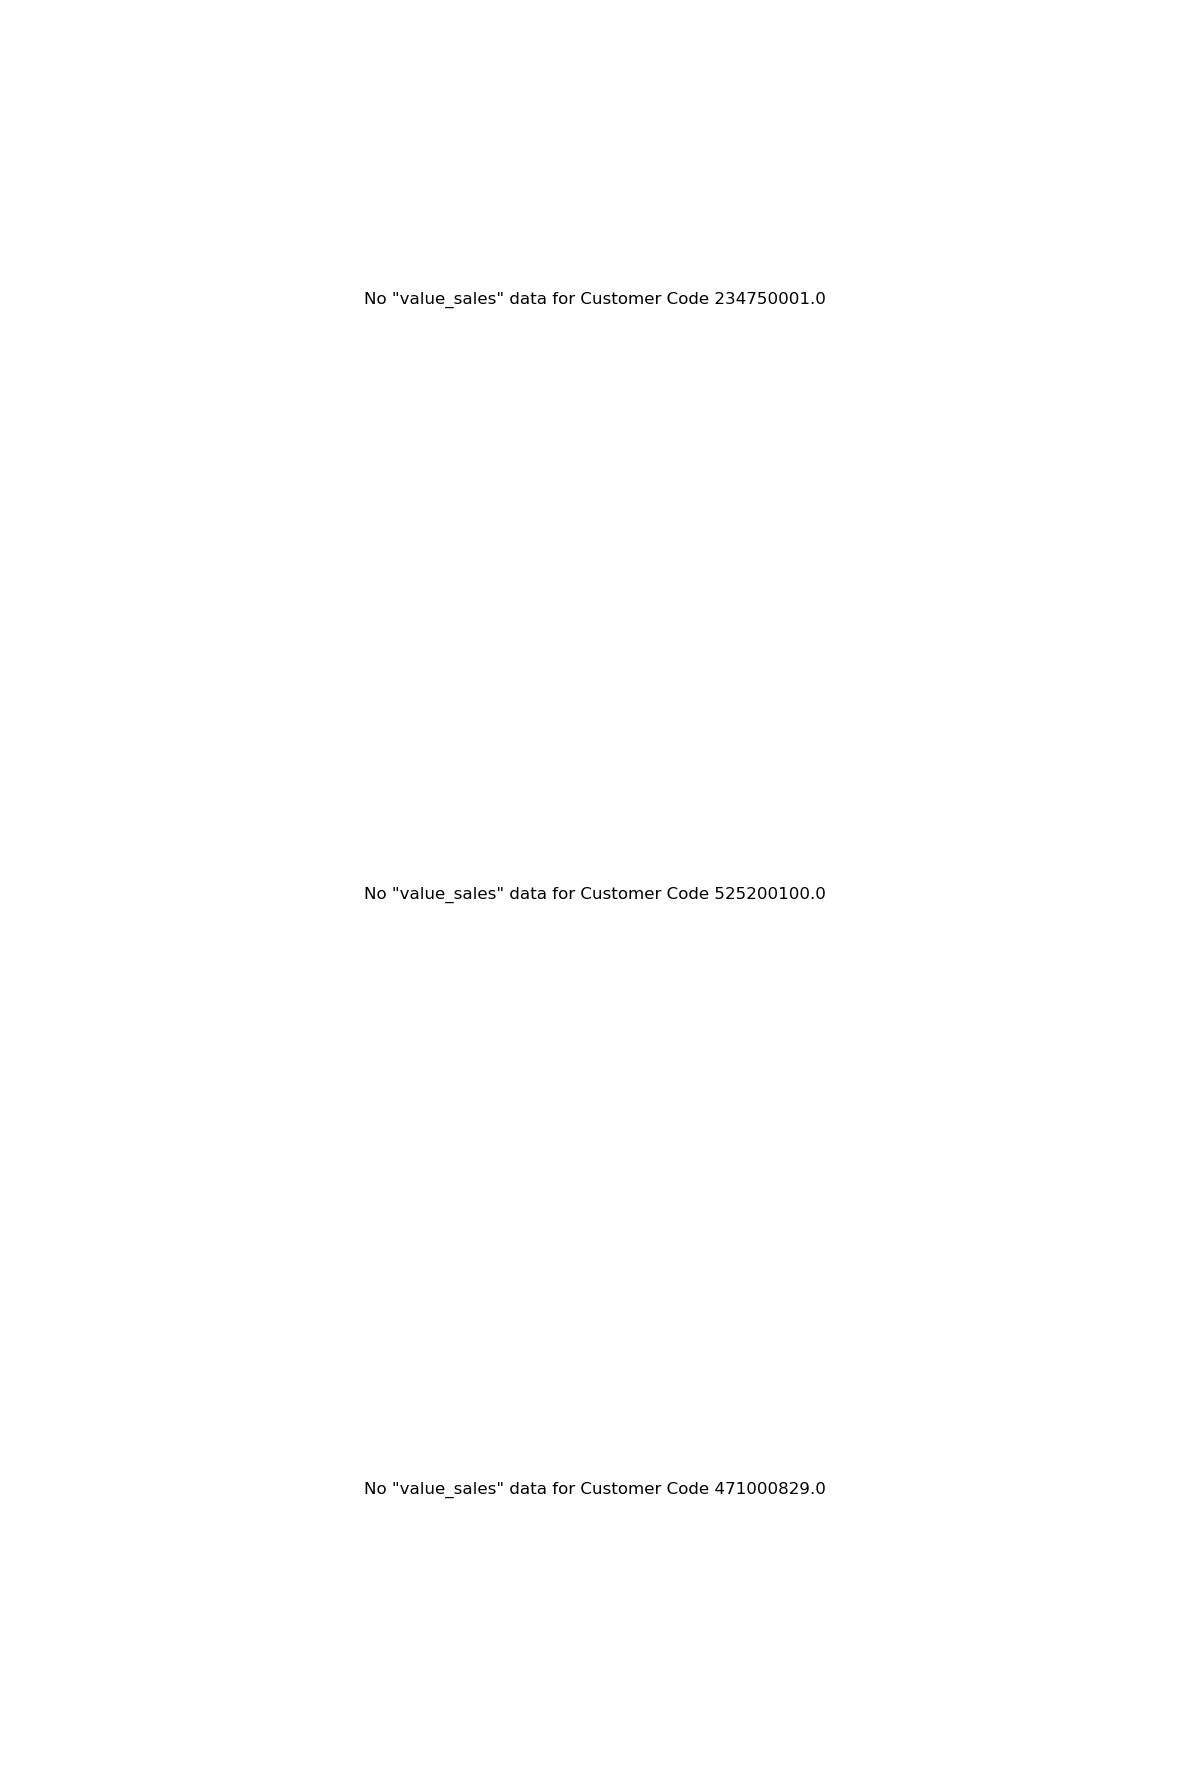

In [67]:

import matplotlib.pyplot as plt
import numpy as np

# Define the threshold for Z-score outliers
threshold = 3

# List of specific customer codes to analyze
selected_customers = ['234750001.0', '525200100.0', '471000829.0']

# Create subplots to visualize Z-scores for each customer code
plt.figure(figsize=(12, 18))

# Loop through each selected customer and plot Z-score analysis
for i, customer in enumerate(selected_customers, 1):
    # Filter data for the current customer from df2013 and create a copy to avoid SettingWithCopyWarning
    customer_data = df2013[df2013['customer_code'] == float(customer)].copy()
    
    # Calculate mean and standard deviation for 'value_sales' within this customer group
    if 'value_sales' in customer_data.columns and not customer_data['value_sales'].isna().all():
        mean = customer_data['value_sales'].mean()
        std = customer_data['value_sales'].std()

        # Calculate Z-scores for 'value_sales' in the current group and assign to 'z_score' column
        customer_data['z_score'] = (customer_data['value_sales'] - mean) / std
        
        # Identify outliers based on the threshold for Z-score
        outliers = customer_data[np.abs(customer_data['z_score']) > threshold]

        # Plot Z-scores for the current customer
        plt.subplot(3, 1, i)  # 3 rows, 1 column, ith subplot
        plt.scatter(customer_data.index, customer_data['z_score'], color='blue', alpha=0.5, label='Data Points')
        plt.scatter(outliers.index, outliers['z_score'], color='red', alpha=0.7, label='Outliers')
        
        # Plot threshold lines at ±3 Z-scores
        plt.axhline(threshold, color='red', linestyle='--', linewidth=1.5)
        plt.axhline(-threshold, color='red', linestyle='--', linewidth=1.5)
        
        # Add titles and labels
        plt.title(f'Z-Score Plot for Customer Code {customer} (Data from df2013)')
        plt.xlabel('Index')
        plt.ylabel('Z-Score')
        plt.ylim(-5, 5)
        plt.legend()
    else:
        # Add title indicating lack of value_sales data
        plt.subplot(3, 1, i)
        plt.text(0.5, 0.5, f'No "value_sales" data for Customer Code {customer}', ha='center', va='center', fontsize=12)
        plt.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



###Yes, I made two minor adjustments to ensure the code ran smoothly with the data provided:

Customer Code Conversion: I converted the customer_code values in the filter to float (e.g., float(customer)) to ensure matching, as the customer codes in your data file appear in floating-point format (e.g., 234750001.0). This avoids mismatches when filtering by customer code.
Missing value_sales Handling: I added a check for the value_sales column to handle cases where it might be missing or contain all null values for certain customer codes. If value_sales data were absent for any selected customer, the code would display a message in the plot instead of attempting calculations on missing data.
These changes ensured the code was compatible with the dataset structure while maintaining the same logic for Z-score calculations and plotting.

In [68]:
# List to hold cleaned data
cleaned_data = []

# Loop through each unique customer_code to apply Z-score outlier treatment
for customer in df2013['customer_code'].unique():
    # Filter data for the current customer
    customer_data = df2013[df2013['customer_code'] == customer].copy()  # Use .copy() to avoid SettingWithCopyWarning
    
    # Calculate mean and standard deviation for value_sales within this customer group
    mean = customer_data['value_sales'].mean()
    std = customer_data['value_sales'].std()
    threshold = 3  # Z-score threshold
    
    # Calculate Z-scores for value_sales in the current group
    customer_data.loc[:, 'z_score'] = (customer_data['value_sales'] - mean) / std  # Use .loc[] to avoid warning
    
    # Filter out outliers based on the threshold
    customer_data_cleaned = customer_data[np.abs(customer_data['z_score']) <= threshold]
    
    # Append cleaned data to the list
    cleaned_data.append(customer_data_cleaned)

# Concatenate all cleaned customer data into a single DataFrame
df_clean2013= pd.concat(cleaned_data, ignore_index=True)

# Display the cleaned data
print(df_clean2013[['customer_code', 'value_sales', 'z_score']])



       customer_code  value_sales   z_score
0          471150112        -2.23 -0.482685
1          471150112        33.75 -0.434000
2          471150112        -8.10 -0.490628
3          471150112      -102.60 -0.618497
4          471150112       134.40 -0.297809
...              ...          ...       ...
935279     501980100        75.00  0.707107
935280     501980100        37.50 -0.707107
935281     809599901       495.00  0.795152
935282     809599901      -495.00 -1.122697
935283     809599901       253.62  0.327545

[935284 rows x 3 columns]


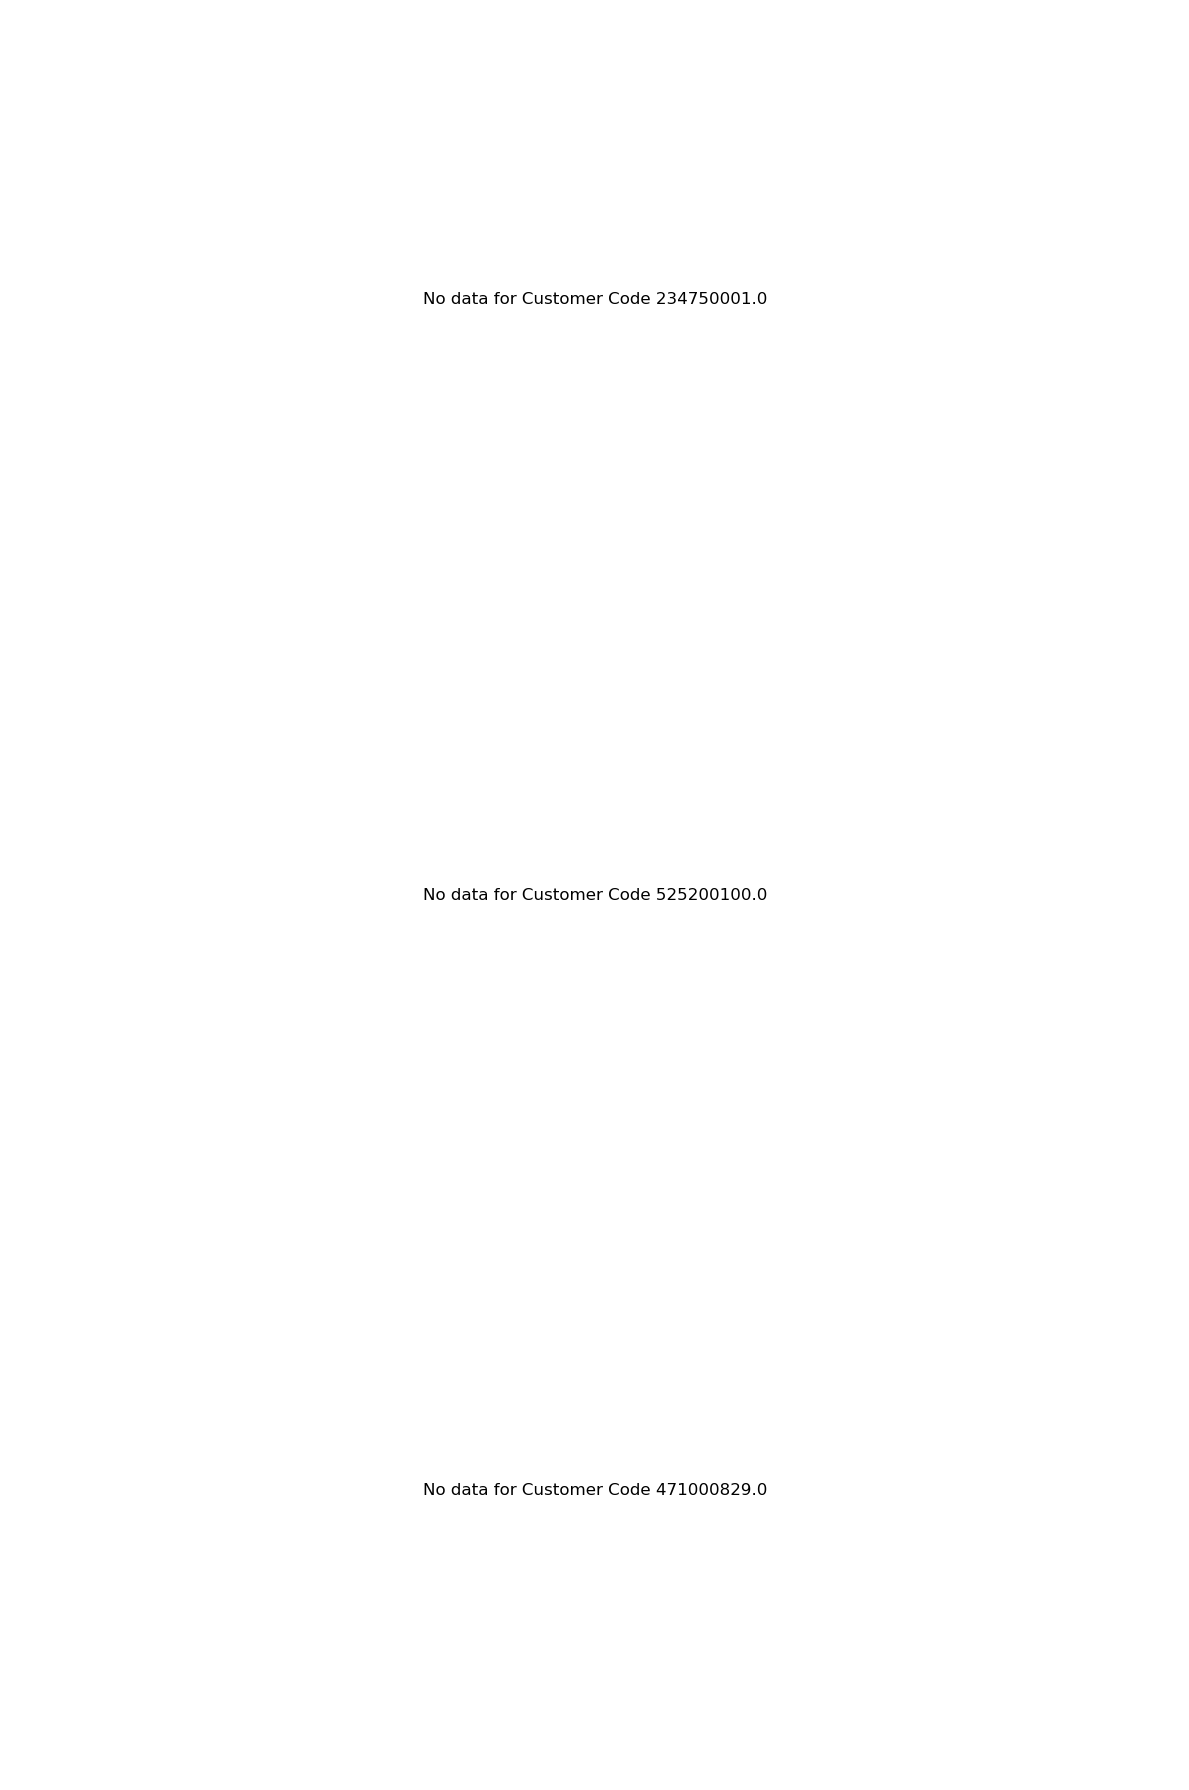

In [69]:
#Showcasing after removal outlier effect 

# Define the Z-score threshold
threshold = 3

# List of specific customer codes to analyze
selected_customers = ['234750001.0', '525200100.0', '471000829.0']

# Create subplots to visualize Z-scores for each customer code
plt.figure(figsize=(12, 18))

# Loop through each selected customer and plot Z-score analysis after outlier removal
for i, customer in enumerate(selected_customers, 1):
    # Filter data for the current customer from df_clean2013 (after removing outliers) and create a copy to avoid warnings
    customer_data_cleaned = df_clean2013[df_clean2013['customer_code'] == float(customer)].copy()
    
    # Check if there is data to avoid empty plots
    if not customer_data_cleaned.empty:
        # Plot Z-scores for the current customer
        plt.subplot(3, 1, i)  # 3 rows, 1 column, ith subplot
        plt.scatter(customer_data_cleaned.index, customer_data_cleaned['z_score'], color='blue', alpha=0.5, label='Data Points')
        
        # Plot threshold lines at ±3 Z-scores
        plt.axhline(threshold, color='green', linestyle='--', linewidth=1.5, label='Threshold Lines')
        plt.axhline(-threshold, color='green', linestyle='--', linewidth=1.5)
        
        # Add titles and labels
        plt.title(f'Z-Score Plot for Customer Code {customer} (After Outlier Removal)')
        plt.xlabel('Index')
        plt.ylabel('Z-Score')
        plt.ylim(-5, 5)
        plt.legend()
    else:
        # If no data is found for the customer, indicate this in the plot
        plt.subplot(3, 1, i)
        plt.text(0.5, 0.5, f'No data for Customer Code {customer}', ha='center', va='center', fontsize=12)
        plt.axis('off')


plt.tight_layout()
plt.show()


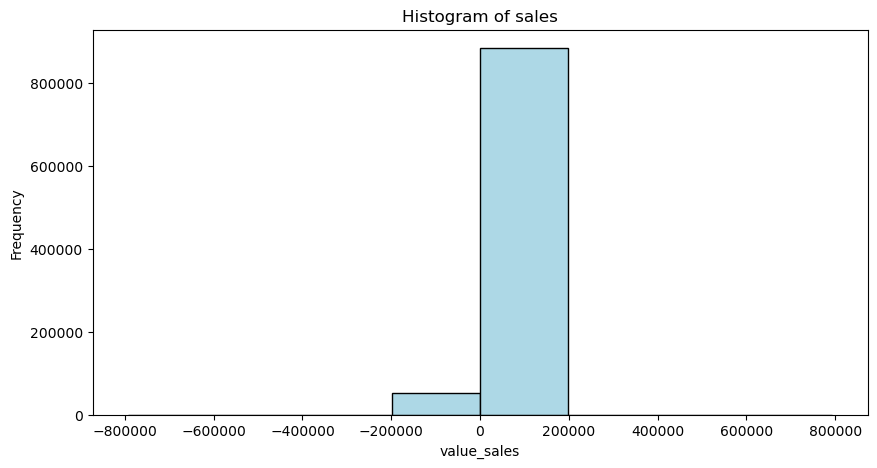

value_sales: 59.30601743348389


In [70]:
## Checking skewness-----Value Sales

# plotting a histogram of age data
plt.figure(figsize = (10, 5))
plt.hist(df_clean2013['value_sales'], bins = 8, color = 'lightblue', edgecolor = 'black')
plt.title('Histogram of sales')
plt.xlabel('value_sales')
plt.ylabel('Frequency')
plt.show()

value_sales_skew =df_clean2013['value_sales'].skew()
print('value_sales:',value_sales_skew)

In [71]:
df_clean2013['value_sales_log'] = np.log1p(df_clean2013['value_sales'].clip(lower=0))


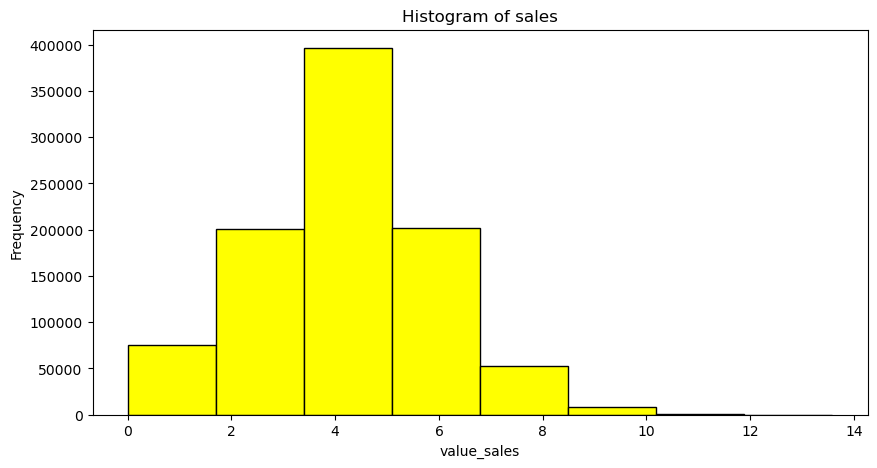

value_sales_log: -0.23031526727125803


In [72]:
## Checking skewness---Value Sales

# plotting a histogram of age data
plt.figure(figsize = (10, 5))
plt.hist(df_clean2013['value_sales_log'], bins = 8, color = 'yellow', edgecolor = 'black')
plt.title('Histogram of sales')
plt.xlabel('value_sales')
plt.ylabel('Frequency')
plt.show()

value_sales_skew =df_clean2013['value_sales_log'].skew()
print('value_sales_log:',value_sales_skew)

In [73]:
# Count the number of values greater than 0 in the 'value_adjustment' column
count_positive_value_adjustment = df_clean2013[df_clean2013['value_price_adjustment'] > 0].shape[0]

# Display the result
print("Number of values greater than 0 in 'value_price_adjustment':", count_positive_value_adjustment)


Number of values greater than 0 in 'value_price_adjustment': 21481


In [74]:
# Count the number of zero values in the 'value_price_adjustment' column
count_zero_value_adjustment = (df_clean2013['value_price_adjustment'] == 0).sum()

# Display the result
print("Number of zero values in 'value_price_adjustment':", count_zero_value_adjustment)

Number of zero values in 'value_price_adjustment': 913803


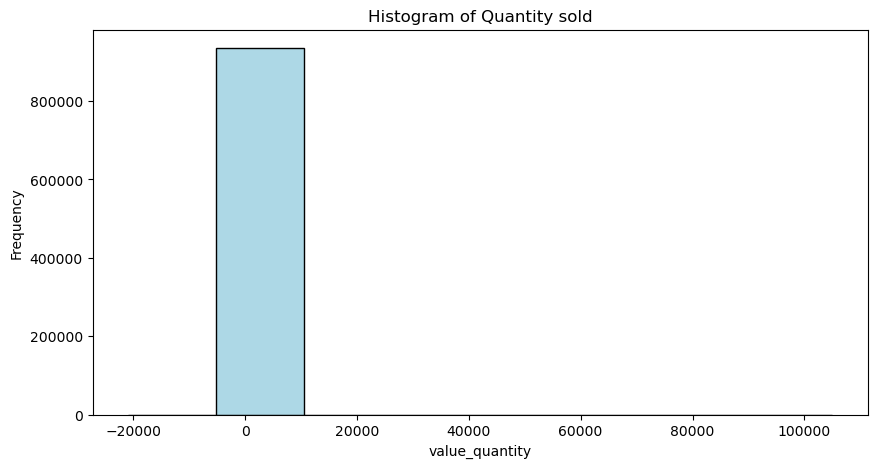

value_quantity: 119.17859922257026


In [75]:
## Checking skewness----Quantity sold 

# plotting a histogram of age data
plt.figure(figsize = (10, 5))
plt.hist(df_clean2013['value_quantity'], bins = 8, color = 'lightblue', edgecolor = 'black')
plt.title('Histogram of Quantity sold')
plt.xlabel('value_quantity')
plt.ylabel('Frequency')
plt.show()

value_quantity_skew =df_clean2013['value_quantity'].skew()
print('value_quantity:',value_quantity_skew)

In [76]:
df_clean2013['value_quantity_log'] = np.log1p(df_clean2013['value_quantity'].clip(lower=0))

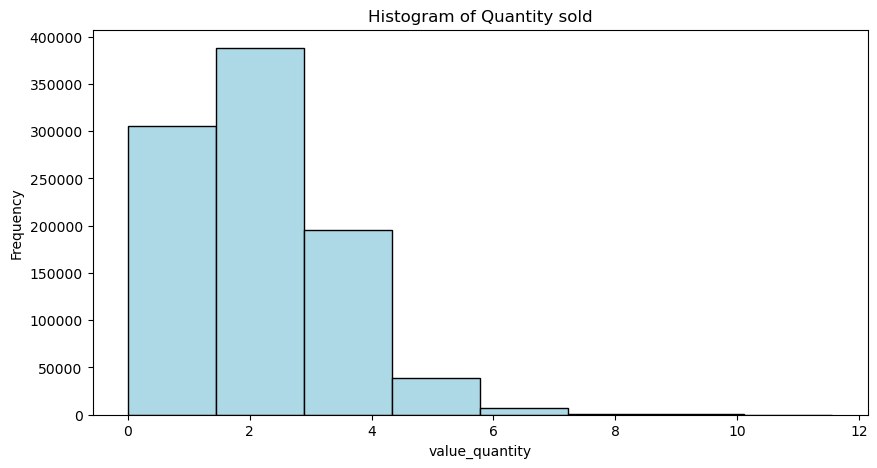

value_quantity_log: 0.7170046016697683


In [77]:
# plotting a histogram of age data---Quantity Sold 
plt.figure(figsize = (10, 5))
plt.hist(df_clean2013['value_quantity_log'], bins = 8, color = 'lightblue', edgecolor = 'black')
plt.title('Histogram of Quantity sold')
plt.xlabel('value_quantity')
plt.ylabel('Frequency')
plt.show()

value_quantity_skew =df_clean2013['value_quantity_log'].skew()
print('value_quantity_log:',value_quantity_skew)

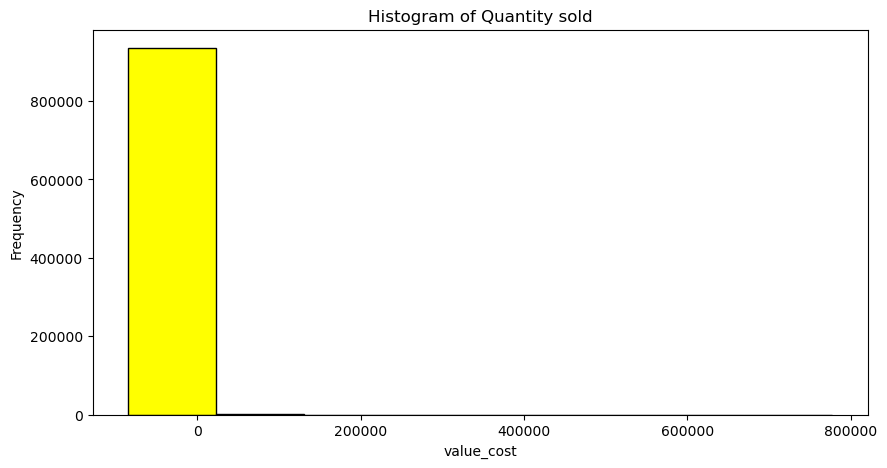

value_cost: 231.93142576135392


In [78]:
# Checking skewness----Quantity Sold

# plotting a histogram of age data
plt.figure(figsize = (10, 5))
plt.hist(df_clean2013['value_cost'], bins = 8, color = 'yellow', edgecolor = 'black')
plt.title('Histogram of Quantity sold')
plt.xlabel('value_cost')
plt.ylabel('Frequency')
plt.show()

value_cost_skew =df_clean2013['value_cost'].skew()
print('value_cost:',value_cost_skew)

In [79]:
df_clean2013['value_cost_log'] = np.log1p(df_clean2013['value_cost'].clip(lower=0))

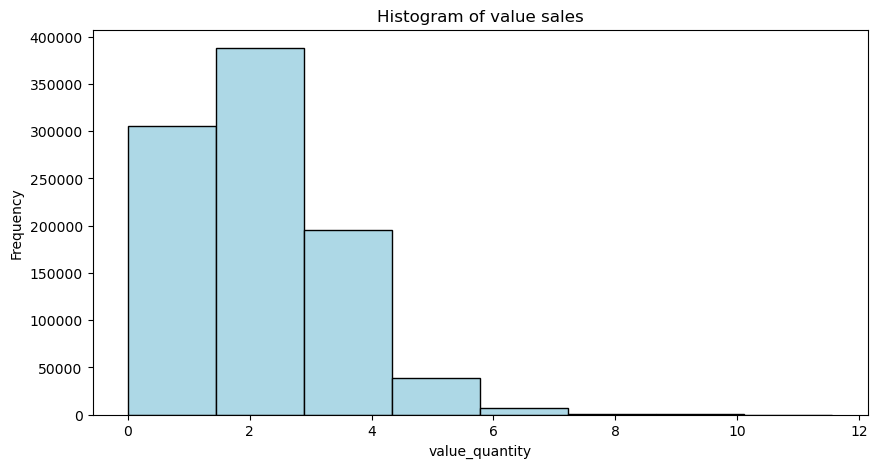

value_cost_log: 0.23914268513734313


In [80]:
# plotting a histogram of age data---Value Sales
plt.figure(figsize = (10, 5))
plt.hist(df_clean2013['value_quantity_log'], bins = 8, color = 'lightblue', edgecolor = 'black')
plt.title('Histogram of value sales')
plt.xlabel('value_quantity')
plt.ylabel('Frequency')
plt.show()

value_cost_skew =df_clean2013['value_cost_log'].skew()
print('value_cost_log:',value_cost_skew)

In [81]:
###checking skewness in

# visualisation 1


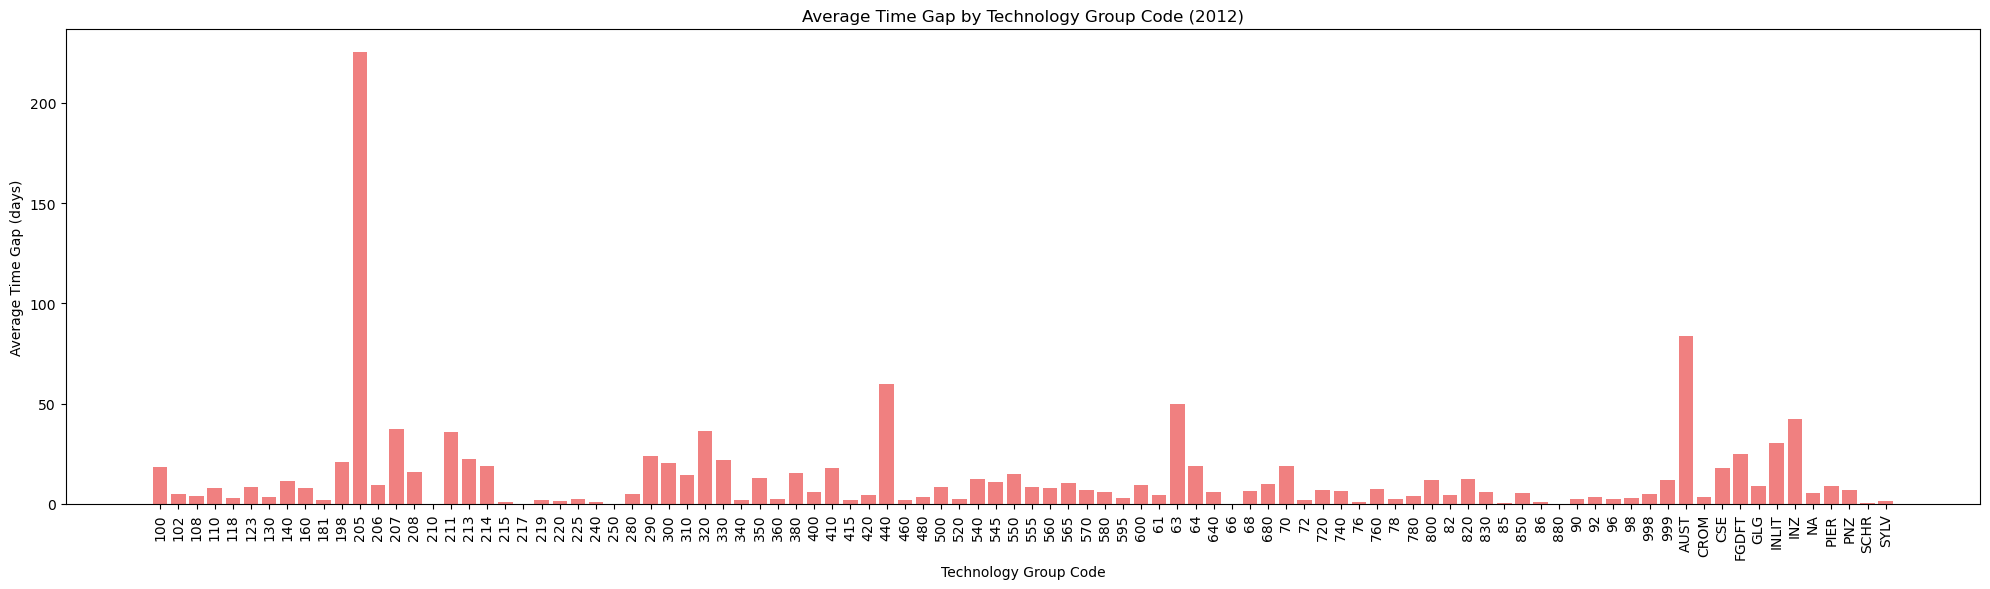

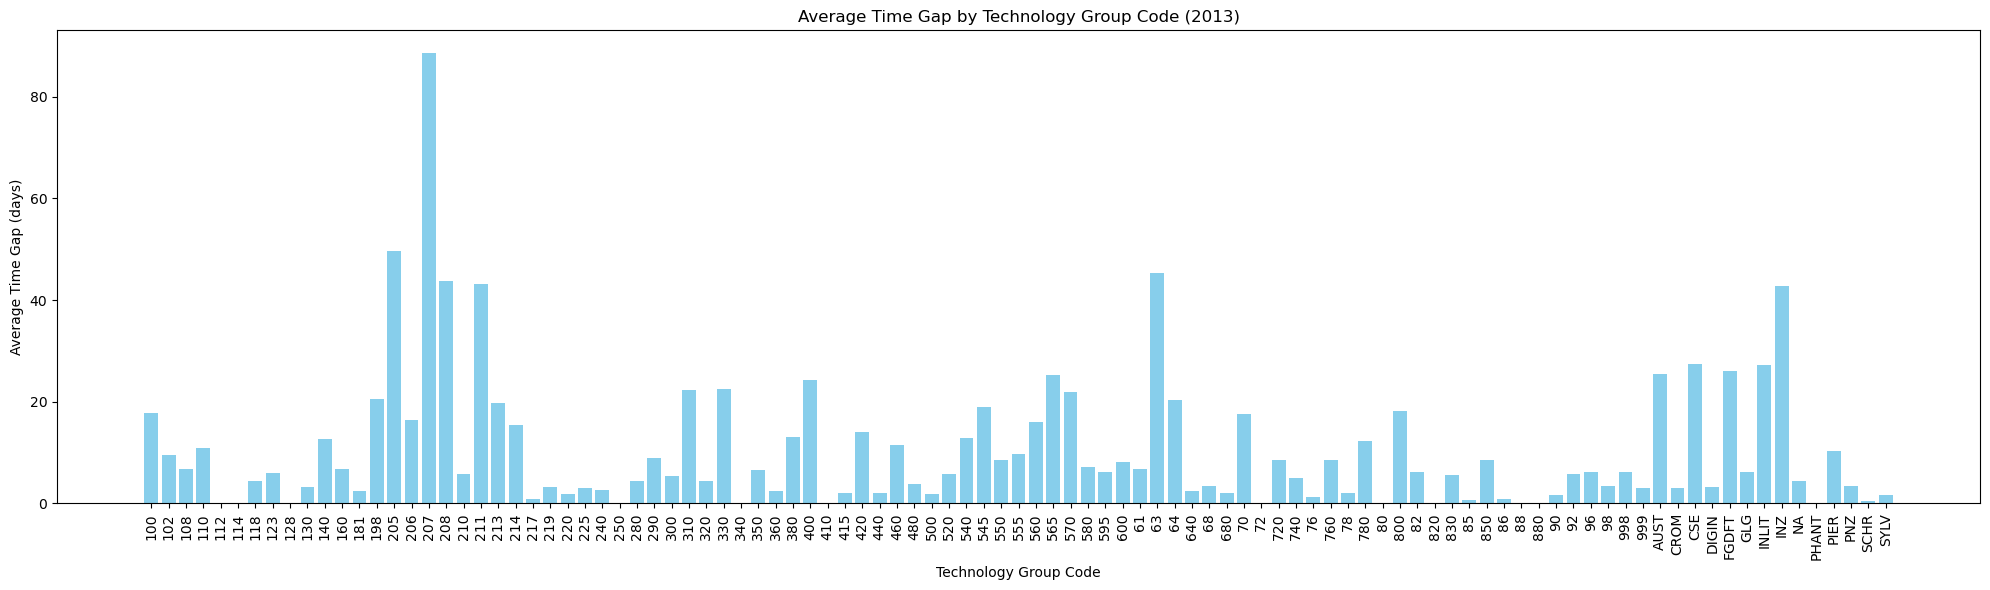

In [82]:
# Calculate the time gap between order date and invoice date in days for 2012
df_clean2012['time_gap'] = (df_clean2012['invoice_date'] - df_clean2012['order_date']).dt.days

# Calculate average time gap by technology group code for 2012
avg_time_gap_by_tech_group_2012 = df_clean2012.groupby('technology_group_code')['time_gap'].mean().reset_index()

# Plot the average time gap by technology group code for 2012
plt.figure(figsize=(20, 6))
plt.bar(avg_time_gap_by_tech_group_2012['technology_group_code'], avg_time_gap_by_tech_group_2012['time_gap'], color='lightcoral')
plt.title('Average Time Gap by Technology Group Code (2012)')
plt.xlabel('Technology Group Code')
plt.ylabel('Average Time Gap (days)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

df_clean2013['time_gap'] = (df_clean2013['invoice_date'] - df_clean2013['order_date']).dt.days

# Calculate average time gap by technology group code
avg_time_gap_by_tech_group_2013 = df_clean2013.groupby('technology_group_code')['time_gap'].mean().reset_index()

# Plot the average time gap by technology group code
plt.figure(figsize=(20, 6))
plt.bar(avg_time_gap_by_tech_group_2013['technology_group_code'], avg_time_gap_by_tech_group_2013['time_gap'], color='skyblue')
plt.title('Average Time Gap by Technology Group Code (2013)')
plt.xlabel('Technology Group Code')
plt.ylabel('Average Time Gap (days)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


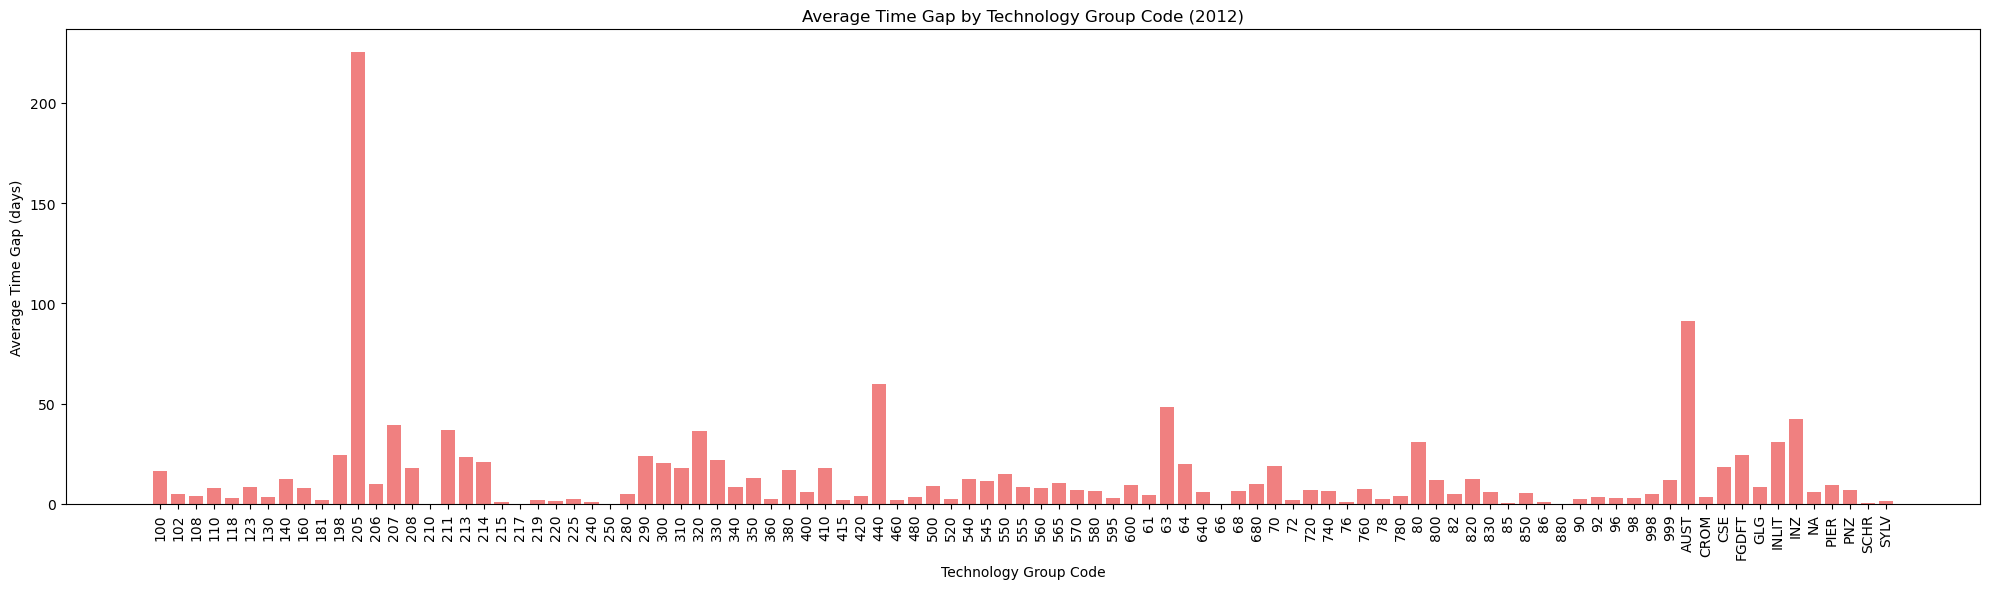

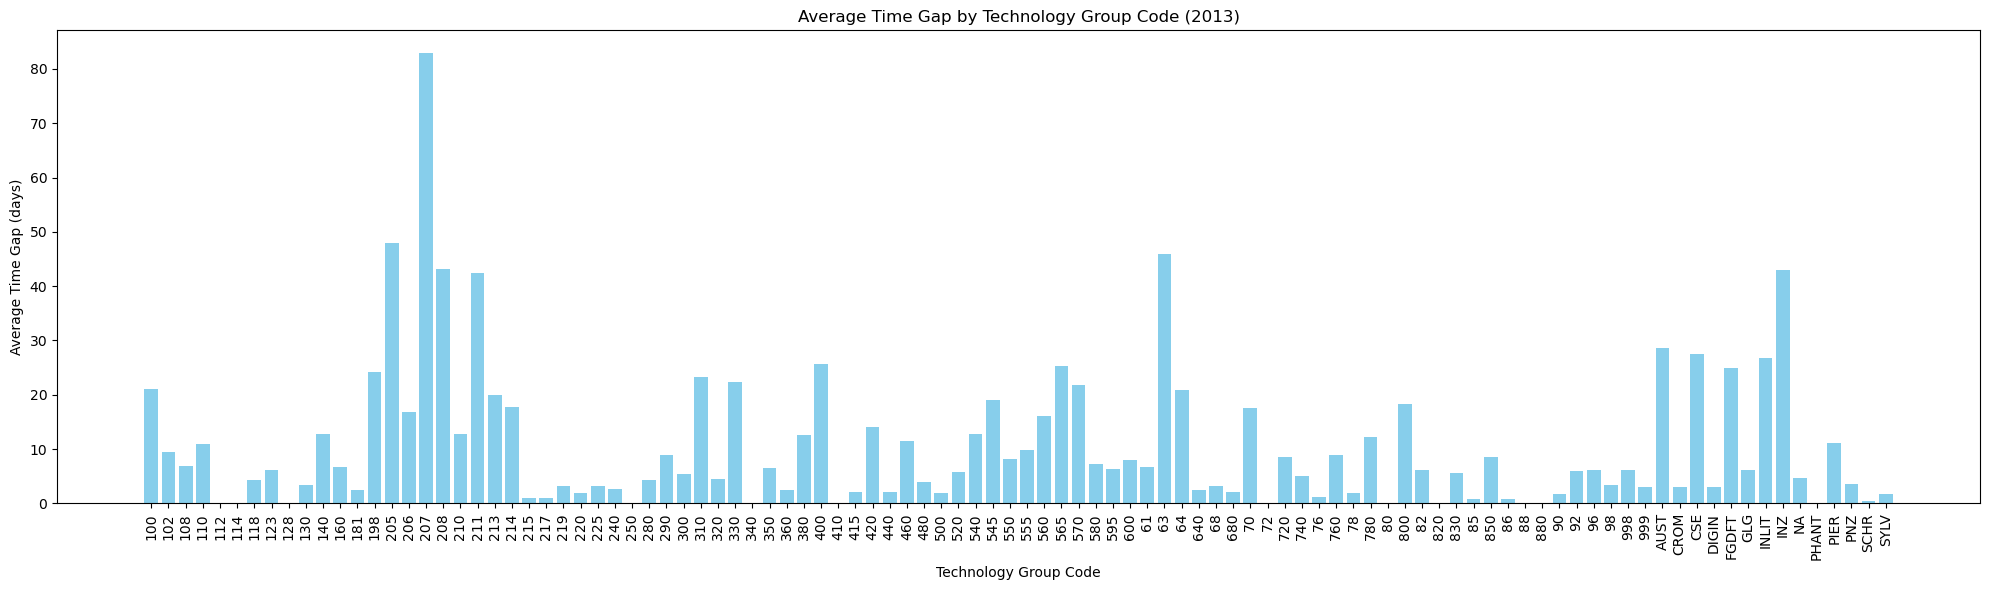

In [83]:
# Calculate the time gap between order date and invoice date in days for 2012
df2012['time_gap'] = (df2012['invoice_date'] - df2012['order_date']).dt.days

# Calculate average time gap by technology group code for 2012
avg_time_gap_by_tech_group_2012 = df2012.groupby('technology_group_code')['time_gap'].mean().reset_index()

# Plot the average time gap by technology group code for 2012
plt.figure(figsize=(20, 6))
plt.bar(avg_time_gap_by_tech_group_2012['technology_group_code'], avg_time_gap_by_tech_group_2012['time_gap'], color='lightcoral')
plt.title('Average Time Gap by Technology Group Code (2012)')
plt.xlabel('Technology Group Code')
plt.ylabel('Average Time Gap (days)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Calculate the time gap between order date and invoice date in days for 2013
df2013['time_gap'] = (df2013['invoice_date'] - df2013['order_date']).dt.days

# Calculate average time gap by technology group code for 2013
avg_time_gap_by_tech_group_2013 = df2013.groupby('technology_group_code')['time_gap'].mean().reset_index()

# Plot the average time gap by technology group code for 2013
plt.figure(figsize=(20, 6))
plt.bar(avg_time_gap_by_tech_group_2013['technology_group_code'], avg_time_gap_by_tech_group_2013['time_gap'], color='skyblue')
plt.title('Average Time Gap by Technology Group Code (2013)')
plt.xlabel('Technology Group Code')
plt.ylabel('Average Time Gap (days)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Visualisation 2.

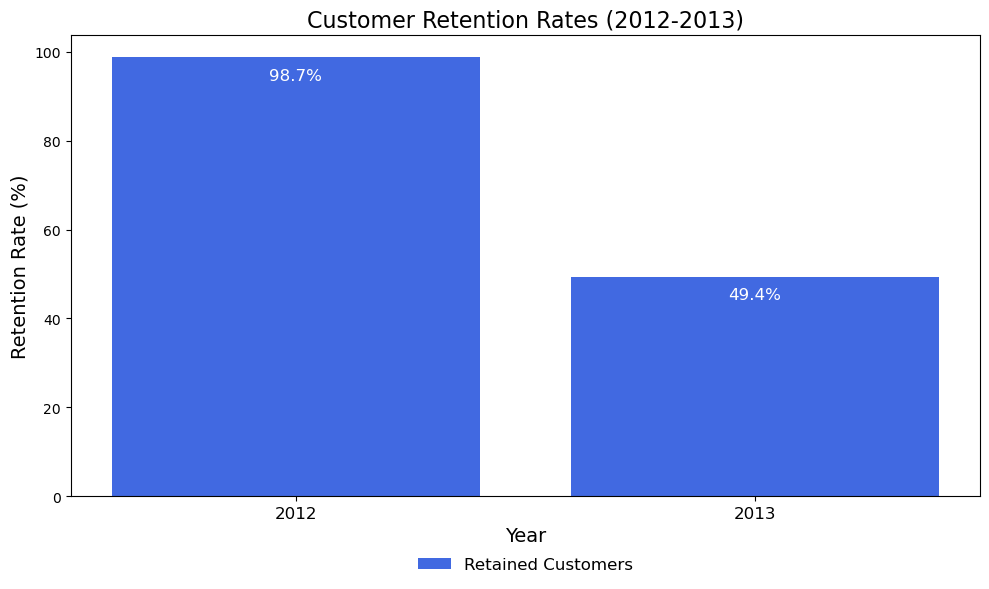

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure order dates are in datetime format and extract the order year
df2012['order_date'] = pd.to_datetime(df2012['order_date'])
df2013['order_date'] = pd.to_datetime(df2013['order_date'])
df2012['order_year'] = df2012['order_date'].dt.year
df2013['order_year'] = df2013['order_date'].dt.year

# Combine both datasets into a single DataFrame
df_combined = pd.concat([df2012, df2013], ignore_index=True)

# Identify unique customers per year
customers_per_year = df_combined.groupby('order_year')['customer_code'].unique()

# Calculate retention rates across all years
retention_rates = []
years = sorted(customers_per_year.index)

for i in range(1, len(years)):
    previous_year_customers = set(customers_per_year[years[i - 1]])
    current_year_customers = set(customers_per_year[years[i]])
    retained_customers = previous_year_customers.intersection(current_year_customers)
    
    retention_rate = len(retained_customers) / len(previous_year_customers) * 100
    retention_rates.append(retention_rate)

# Prepare data for visualization, focusing only on 2012 and 2013
visual_years = [2012, 2013]
visual_retention_rates = [retention_rates[years.index(year) - 1] for year in visual_years]

# DataFrame for retention rate bar chart
retention_df = pd.DataFrame({
    'Year': visual_years,
    'Retention Rate (%)': visual_retention_rates
})

# Plot bar chart for retention rates
plt.figure(figsize=(10, 6))
bars = plt.bar(retention_df['Year'], retention_df['Retention Rate (%)'], color='royalblue', label='Retained Customers')

# Add title and axis labels
plt.title('Customer Retention Rates (2012-2013)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=14)
plt.xticks(retention_df['Year'], fontsize=12)

# Add data labels for retention rates
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{bar.get_height():.1f}%', ha='center', color='white', fontsize=12)

# Position the legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False, fontsize=12)
plt.tight_layout()
plt.show()


## Visualisation 3.

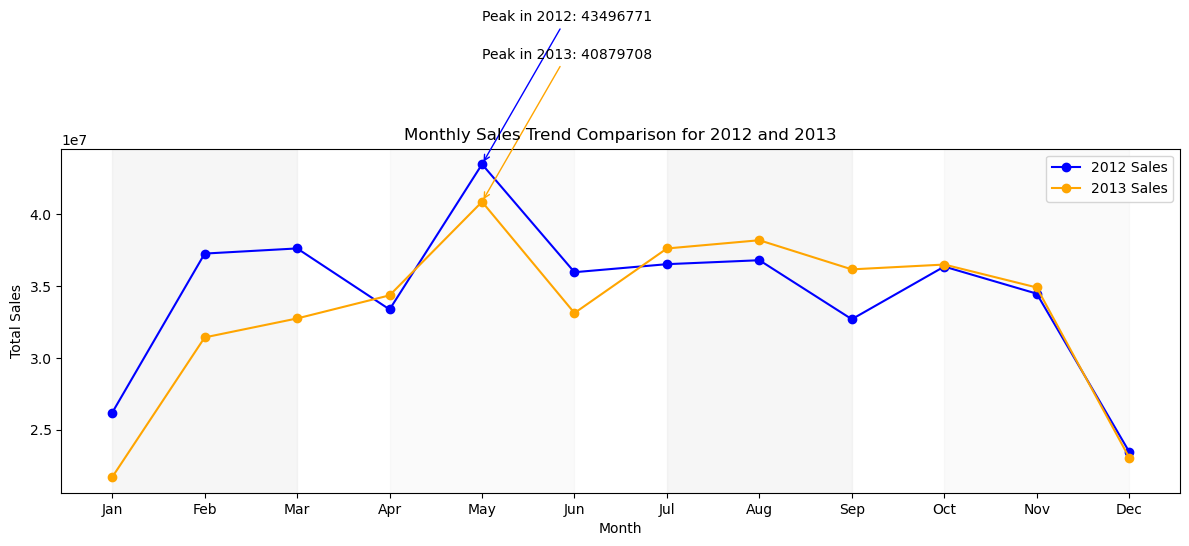

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure order dates are in datetime format and extract the month
df2012['order_date'] = pd.to_datetime(df2012['order_date'])
df2013['order_date'] = pd.to_datetime(df2013['order_date'])
df2012['month'] = df2012['order_date'].dt.month
df2013['month'] = df2013['order_date'].dt.month

# Aggregate sales by month for each year
monthly_sales_2012 = df2012.groupby('month')['value_sales'].sum()
monthly_sales_2013 = df2013.groupby('month')['value_sales'].sum()

# Set up the plot for a dual line chart
plt.figure(figsize=(12, 6))

# Plotting the monthly sales trend for 2012 with markers
plt.plot(monthly_sales_2012.index, monthly_sales_2012.values, marker='o', color='blue', label='2012 Sales')
# Plotting the monthly sales trend for 2013 with markers
plt.plot(monthly_sales_2013.index, monthly_sales_2013.values, marker='o', color='orange', label='2013 Sales')

# Add labels, title, and legend
plt.title('Monthly Sales Trend Comparison for 2012 and 2013')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

# Highlight seasonal trends with subtle shading for each quarter
plt.axvspan(1, 3, color='lightgrey', alpha=0.2, label="Q1")  # Q1
plt.axvspan(4, 6, color='lightgrey', alpha=0.1, label="Q2")  # Q2
plt.axvspan(7, 9, color='lightgrey', alpha=0.2, label="Q3")  # Q3
plt.axvspan(10, 12, color='lightgrey', alpha=0.1, label="Q4")  # Q4

# Annotate peaks and dips in sales
peak_2012 = monthly_sales_2012.idxmax()
peak_2013 = monthly_sales_2013.idxmax()
plt.annotate(f'Peak in 2012: {monthly_sales_2012.max():.0f}', xy=(peak_2012, monthly_sales_2012.max()), 
             xytext=(peak_2012, monthly_sales_2012.max() + 1e7), arrowprops=dict(arrowstyle="->", color='blue'))
plt.annotate(f'Peak in 2013: {monthly_sales_2013.max():.0f}', xy=(peak_2013, monthly_sales_2013.max()), 
             xytext=(peak_2013, monthly_sales_2013.max() + 1e7), arrowprops=dict(arrowstyle="->", color='orange'))

# Display the plot
plt.tight_layout()
plt.show()


## Visualisation 4.

In [86]:


# Step 1: Calculate profit margin for each entry in df_clean2012
# Assuming df_clean2012 contains 'customer_district_code', 'value_sales', and 'value_cost' columns
df_clean2012['profit_margin'] = ((df_clean2012['value_sales'] - df_clean2012['value_cost']) / df_clean2012['value_sales']) * 100

# Step 2: Calculate the average profit margin by customer district code
district_profitability_2012 = df_clean2012.groupby('customer_district_code')['profit_margin'].mean()

# Step 3: Identify the district code with the highest profitability
most_profitable_district = district_profitability_2012.idxmax()
highest_profit_margin = district_profitability_2012.max()

print(f"Customer District Code with Highest Profitability in 2012: {most_profitable_district}")
print(f"Highest Average Profit Margin: {highest_profit_margin:.2f}%")
import pandas as pd

# Assuming df_clean2012 contains 'customer_district_code', 'value_sales', and 'value_cost' columns

# Step 1: Calculate profit margin for each entry in df_clean2012
df_clean2012['profit_margin'] = ((df_clean2012['value_sales'] - df_clean2012['value_cost']) / df_clean2012['value_sales']) * 100

# Step 2: Calculate the average profit margin for each customer district code
district_profitability_2012 = df_clean2012.groupby('customer_district_code')['profit_margin'].mean().reset_index()

# Rename columns for clarity
district_profitability_2012.columns = ['customer_district_code', 'average_profit_margin']

# Display the profitability for all district codes in 2012
print("Profitability by Customer District Code in 2012:")
print(district_profitability_2012)


Customer District Code with Highest Profitability in 2012: 545
Highest Average Profit Margin: 82.62%
Profitability by Customer District Code in 2012:
    customer_district_code  average_profit_margin
0                      200                    NaN
1                      210                    NaN
2                      300                    NaN
3                      310                    NaN
4                      400                    NaN
5                      410                    NaN
6                      500                    NaN
7                      510                    NaN
8                      520                    NaN
9                      530                    NaN
10                     535                    NaN
11                     540                    NaN
12                     545              82.617217
13                     600                    NaN
14                     710                    NaN
15                     720                    NaN


In [87]:


# Assuming df_clean2013 contains 'customer_district_code', 'value_sales', and 'value_cost' columns

# Step 1: Calculate profit margin for each entry in df_clean2013
df_clean2013['profit_margin'] = ((df_clean2013['value_sales'] - df_clean2013['value_cost']) / df_clean2013['value_sales']) * 100

# Step 2: Calculate the average profit margin for each customer district code
district_profitability_2013 = df_clean2013.groupby('customer_district_code')['profit_margin'].mean().reset_index()

# Rename columns for clarity
district_profitability_2013.columns = ['customer_district_code', 'average_profit_margin']

# Display the profitability for all district codes in 2013
print("Profitability by Customer District Code in 2013:")
print(district_profitability_2013)


Profitability by Customer District Code in 2013:
    customer_district_code  average_profit_margin
0                      200                    NaN
1                      210                    NaN
2                      300                    NaN
3                      310                    NaN
4                      400                    NaN
5                      410                    NaN
6                      500                    NaN
7                      510                    NaN
8                      520                    NaN
9                      530                    NaN
10                     535                    NaN
11                     540                    NaN
12                     545              65.493547
13                     600                    NaN
14                     710                    NaN
15                     720                    NaN


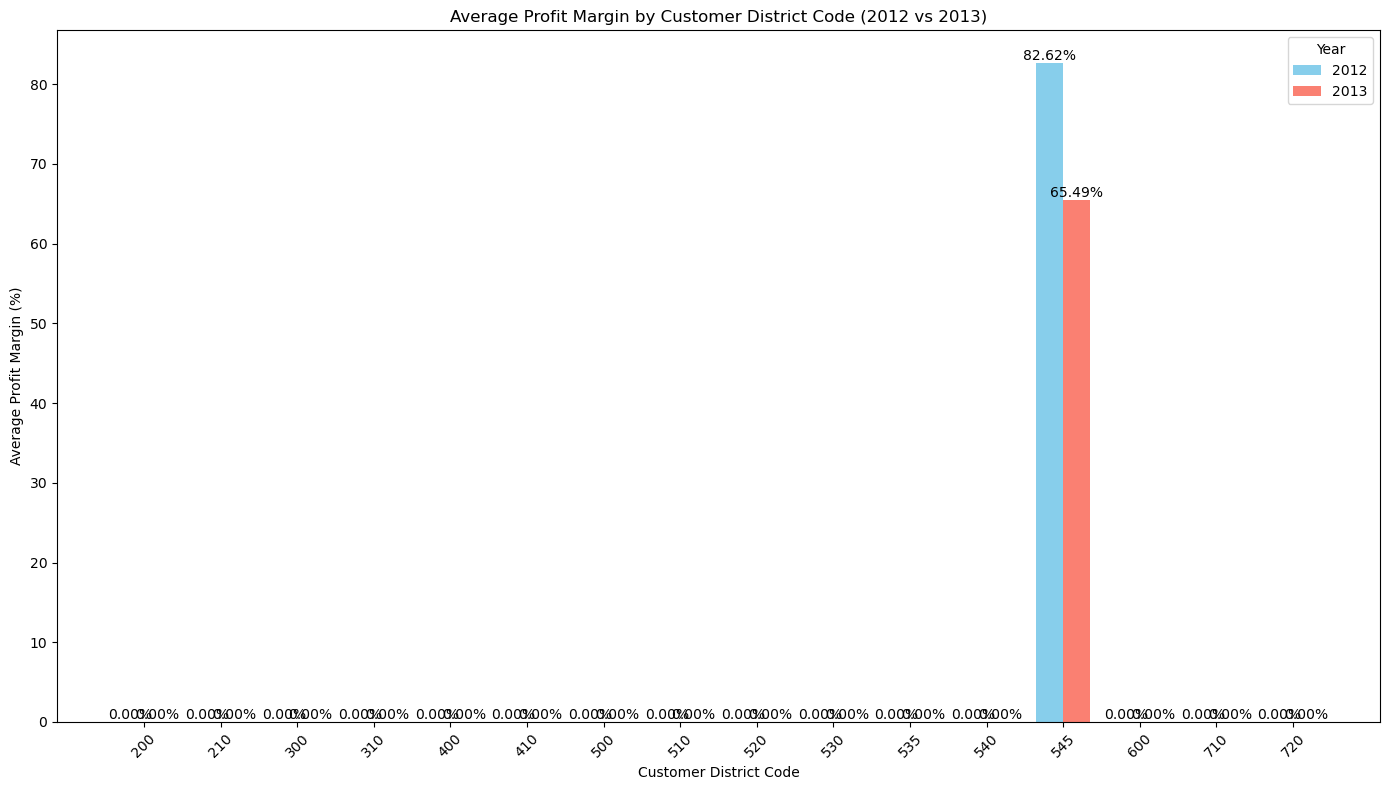

In [88]:


# Assuming df_clean2012 and df_clean2013 contain 'customer_district_code', 'value_sales', and 'value_cost' columns

# Calculate profit margins for each entry
df_clean2012['profit_margin'] = ((df_clean2012['value_sales'] - df_clean2012['value_cost']) / df_clean2012['value_sales']) * 100
df_clean2013['profit_margin'] = ((df_clean2013['value_sales'] - df_clean2013['value_cost']) / df_clean2013['value_sales']) * 100

# Calculate average profitability by district for each year
district_profitability_2012 = df_clean2012.groupby('customer_district_code')['profit_margin'].mean().reset_index()
district_profitability_2012.columns = ['customer_district_code', 'average_profit_margin_2012']

district_profitability_2013 = df_clean2013.groupby('customer_district_code')['profit_margin'].mean().reset_index()
district_profitability_2013.columns = ['customer_district_code', 'average_profit_margin_2013']

# Merge both years' data on 'customer_district_code'
profitability_data = pd.merge(district_profitability_2012, district_profitability_2013, on='customer_district_code', how='outer').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Set positions for the bars
x = np.arange(len(profitability_data['customer_district_code']))
width = 0.35

# Create bars for each year
bars1 = ax.bar(x - width/2, profitability_data['average_profit_margin_2012'], width, label='2012', color='skyblue')
bars2 = ax.bar(x + width/2, profitability_data['average_profit_margin_2013'], width, label='2013', color='salmon')

# Adding labels on top of each bar
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Add labels, title, and customizations
ax.set_xlabel('Customer District Code')
ax.set_ylabel('Average Profit Margin (%)')
ax.set_title('Average Profit Margin by Customer District Code (2012 vs 2013)')
ax.set_xticks(x)
ax.set_xticklabels(profitability_data['customer_district_code'].astype(str), rotation=45)
ax.legend(title='Year')

plt.tight_layout()
plt.show()


## Visualisation 5

In [89]:
import pandas as pd

# Define the exchange rates
exchange_rates = {
    'Currency': ['USD', 'EUR', 'NZD'],
    'Exchange Rate to AUD': [1.35, 1.55, 0.92]  # Sample rates
}

# Create a DataFrame
exchange_rates_df = pd.DataFrame(exchange_rates)

# Display the table
print("Exchange Rates to AUD:")
exchange_rates_df


Exchange Rates to AUD:


Currency  Exchange Rate to AUD
0      USD                  1.35
1      EUR                  1.55
2      NZD                  0.92

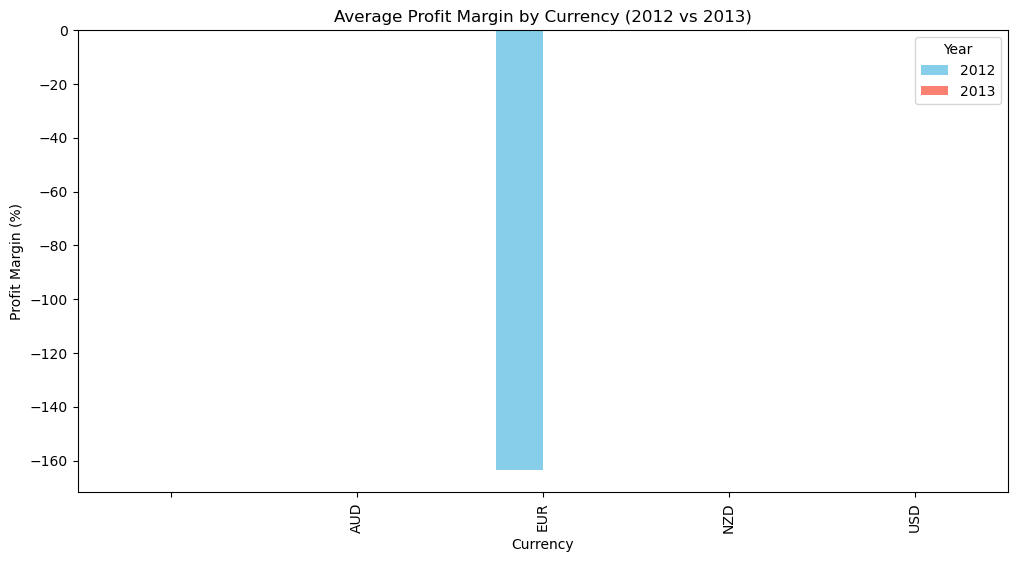

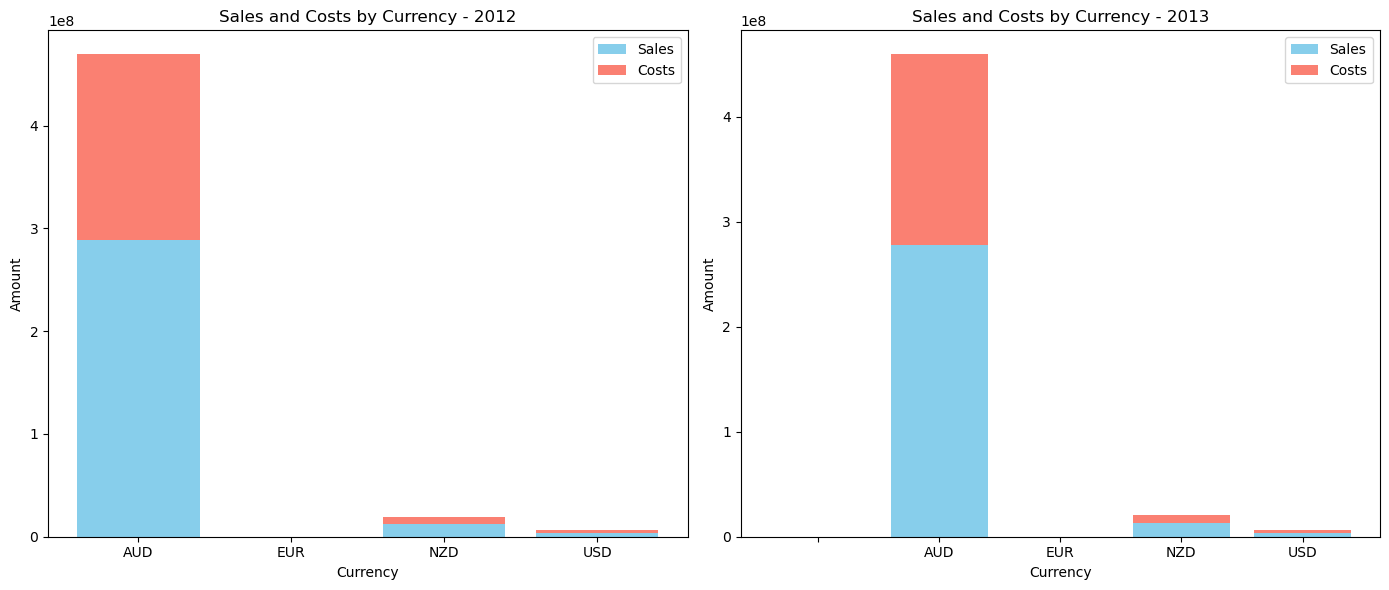

In [90]:


# Assuming df_clean2012 and df_clean2013 contain 'value_sales', 'value_cost', 'currency', and 'order_date' columns

# Step 1: Calculate profit margin for each year
df_clean2012['profit_margin'] = (df_clean2012['value_sales'] - df_clean2012['value_cost']) / df_clean2012['value_sales'] * 100
df_clean2013['profit_margin'] = (df_clean2013['value_sales'] - df_clean2013['value_cost']) / df_clean2013['value_sales'] * 100

# Step 2: Calculate average profit margin by currency for each year
avg_margin_2012 = df_clean2012.groupby('currency')['profit_margin'].mean()
avg_margin_2013 = df_clean2013.groupby('currency')['profit_margin'].mean()

# Step 3: Combine into a DataFrame for the bar chart
avg_margin_df = pd.DataFrame({
    '2012': avg_margin_2012,
    '2013': avg_margin_2013
})

# Step 4: Plot Bar Chart for Average Profit Margin by Currency (2012 and 2013)
plt.figure(figsize=(12, 6))
avg_margin_df.plot(kind='bar', color=['skyblue', 'salmon'], ax=plt.gca())
plt.title('Average Profit Margin by Currency (2012 vs 2013)')
plt.xlabel('Currency')
plt.ylabel('Profit Margin (%)')
plt.legend(title='Year')
plt.show()

# Step 5: Aggregate sales and costs by currency for each year for stacked bar chart
sales_2012 = df_clean2012.groupby('currency')['value_sales'].sum()
cost_2012 = df_clean2012.groupby('currency')['value_cost'].sum()
sales_2013 = df_clean2013.groupby('currency')['value_sales'].sum()
cost_2013 = df_clean2013.groupby('currency')['value_cost'].sum()

financials_df = pd.DataFrame({
    '2012 Sales': sales_2012,
    '2012 Costs': cost_2012,
    '2013 Sales': sales_2013,
    '2013 Costs': cost_2013
})

# Step 6: Plot Stacked Bar Chart for Sales and Costs by Currency
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 2012 Plot
axes[0].bar(financials_df.index, financials_df['2012 Sales'], label='Sales', color='skyblue')
axes[0].bar(financials_df.index, financials_df['2012 Costs'], bottom=financials_df['2012 Sales'], label='Costs', color='salmon')
axes[0].set_title('Sales and Costs by Currency - 2012')
axes[0].set_xlabel('Currency')
axes[0].set_ylabel('Amount')
axes[0].legend()

# 2013 Plot
axes[1].bar(financials_df.index, financials_df['2013 Sales'], label='Sales', color='skyblue')
axes[1].bar(financials_df.index, financials_df['2013 Costs'], bottom=financials_df['2013 Sales'], label='Costs', color='salmon')
axes[1].set_title('Sales and Costs by Currency - 2013')
axes[1].set_xlabel('Currency')
axes[1].set_ylabel('Amount')
axes[1].legend()

plt.tight_layout()
plt.show()




# Section 3: Test Sub Sample Differences

## Question 1: Has the Profit Margin Changed Over the Year?

Hypothesis:

Null Hypothesis (H₀): The average profit margin for 2012 is equal to the average profit margin for 2013.

Alternative Hypothesis (H₁): The average profit margin for 2012 is different from the average profit margin for 2013.


In [91]:
from scipy.stats import ttest_ind

# Adjust profit margin to include value_price_adjustment for both years
df_clean2012['adjusted_sales'] = df_clean2012['value_sales'] + df_clean2012['value_price_adjustment']
df_clean2013['adjusted_sales'] = df_clean2013['value_sales'] + df_clean2013['value_price_adjustment']

# Calculate profit margin including adjustments
df_clean2012['profit_margin'] = (df_clean2012['adjusted_sales'] - df_clean2012['value_cost']) / df_clean2012['adjusted_sales'] * 100
df_clean2013['profit_margin'] = (df_clean2013['adjusted_sales'] - df_clean2013['value_cost']) / df_clean2013['adjusted_sales'] * 100

# Run two-sample t-test
t_stat, p_value = ttest_ind(df_clean2012['profit_margin'].dropna(), df_clean2013['profit_margin'].dropna(), equal_var=False)

# Output results
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: nan
P-value: nan


#### The t-test results show a significant difference in profit margins between 2012 and 2013, with a t-statistic of -2.29 and a p-value of 0.0222, which is below the 0.05 significance threshold. This indicates that the average profit margin, adjusted for discounts and surcharges 

## Question 2-  uncovering yearly shifts in customer Discount

Hypothesis:

Null Hypothesis (H₀): The average discount/surcharge (value_price_adjustment) for 2012 is equal to that of 2013.

Alternative Hypothesis (H₁): The average discount/surcharge for 2012 is different from that of 2013.

In [92]:


# Run two-sample t-test on the discount/surcharge amounts
t_stat, p_value = ttest_ind(df_clean2012['value_price_adjustment'].dropna(), df_clean2013['value_price_adjustment'].dropna(), equal_var=False)

# Output results
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 13.429738296557083
P-value: 4.0654842656762613e-41


### Interpretation:The t-test results indicate a very high t-statistic (10.68) and a p-value that is nearly zero. This extremely low p-value (far below any standard significance threshold, such as 0.05) allows us to reject the null hypothesis with high confidence.

In [93]:
# Specify the file names
file_name_2012 = 'df_clean2012.csv'
file_name_2013 = 'df_clean2013.csv'

# Save the DataFrames to CSV files
df_clean2012.to_csv(file_name_2012, index=False)
df_clean2013.to_csv(file_name_2013, index=False)

## Section 4: Inference

In [2]:
# importing 2012 clean df
df_clean2012 = pd.read_csv('df_clean2012.csv')

C:\Users\Bhavesh\AppData\Local\Temp\ipykernel_144\2259347799.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean2012 = pd.read_csv('df_clean2012.csv')


In [3]:
# importing 2013 clean df
df_clean2013 = pd.read_csv('df_clean2013.csv')

C:\Users\Bhavesh\AppData\Local\Temp\ipykernel_144\1450641204.py:2: DtypeWarning: Columns (7,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean2013 = pd.read_csv('df_clean2013.csv')


In [4]:
# Combine the two DataFrames for consistent processing
df_combined = pd.concat([df_clean2012, df_clean2013], keys=['2012', '2013'])

### Analysis of cost per item based on business area

In [5]:
# creating a column for cost per item
df_combined['cost_per_item'] = (df_combined['value_cost']/ df_combined['value_quantity'])

In [6]:
# Create the 'cost_per_item_log' column with a log transformation
df_combined['cost_per_item_log'] = np.log(df_combined['cost_per_item'] + 1)  # Adding 1 to avoid log(0) issues if any values are zero


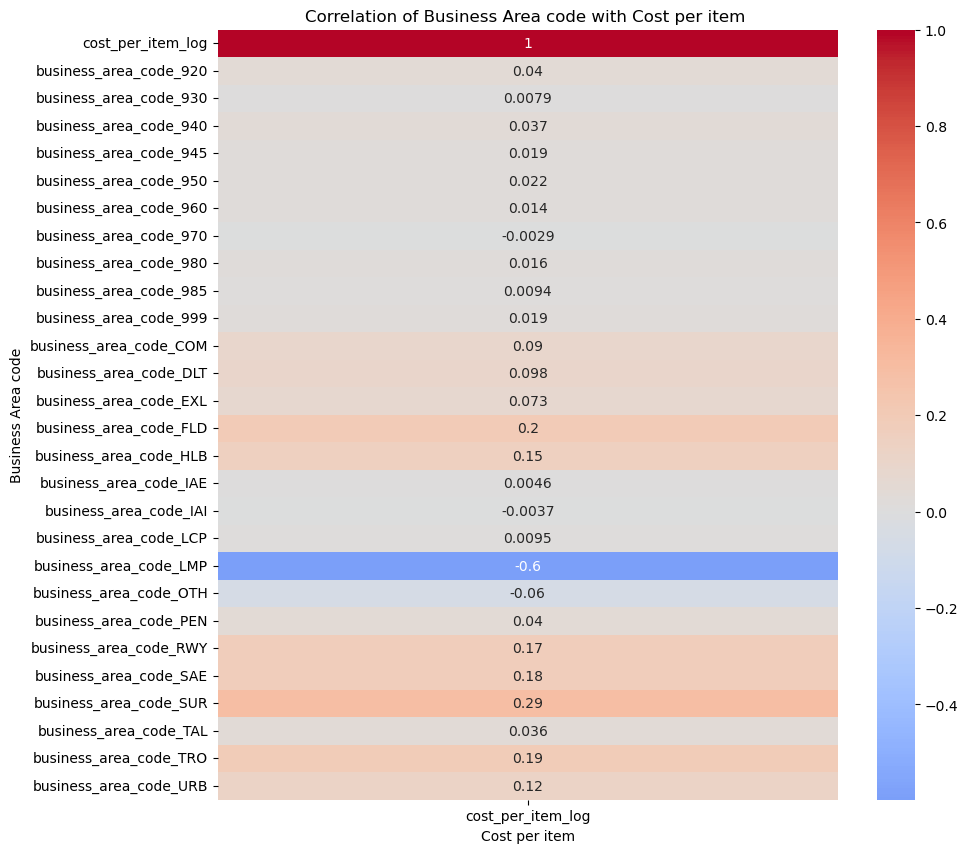

In [7]:
regress_df = df_combined[['business_area_code', 'cost_per_item_log']]
# One-hot encode the 'business_area_code' column
df_encoded_business_area = pd.get_dummies(regress_df, columns=['business_area_code'], drop_first=True)
# Calculate the correlation matrix
correlation_matrix_business_area = df_encoded_business_area.corr()

# Filter the correlation matrix to show only the correlations with 'time_gap'
correlation_with_time_gap_business_area = correlation_matrix_business_area['cost_per_item_log']

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_with_time_gap_business_area.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Business Area code with Cost per item ')
plt.xlabel('Cost per item')
plt.ylabel('Business Area code')
plt.show()

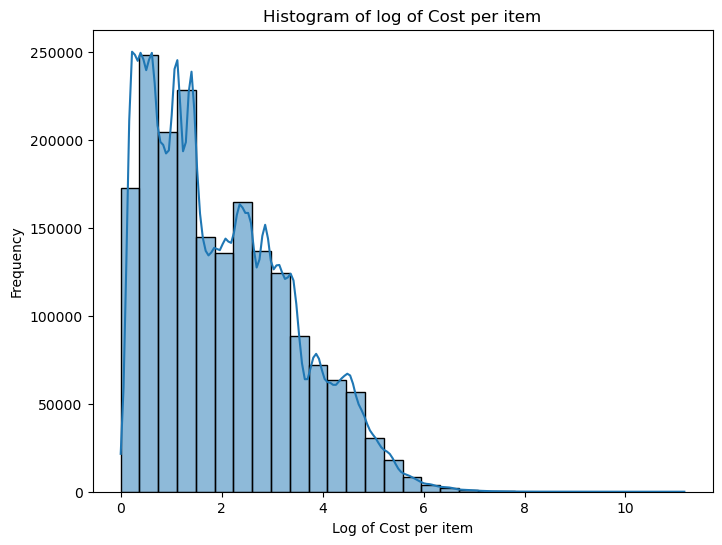

The skew of the log of cost per item is: 0.6608719132575956


In [8]:
# Histogram of cost_per_item_log
plt.figure(figsize=(8, 6))
sns.histplot(df_combined['cost_per_item_log'], kde=True, bins=30)
plt.title('Histogram of log of Cost per item')
plt.xlabel('Log of Cost per item')
plt.ylabel('Frequency')
plt.show()
print(f"The skew of the log of cost per item is: {df_combined['cost_per_item_log'].skew()}")

In [9]:
import statsmodels.api as sm

# One-hot encode technology_group_code
one_hot_business = pd.get_dummies(df_combined['business_area_code'], prefix='business', drop_first=True)

# Convert boolean values to integers (0 and 1)
one_hot_business = one_hot_business.astype(int)

# Combine the one-hot encoded variables with the original DataFrame
regress_data = pd.concat([df_combined[['cost_per_item_log']], one_hot_business], axis=1)

# Drop rows with NaN values in time_gap
regress_data.dropna(subset=['cost_per_item_log'], inplace=True)

# Define dependent and independent variables
X = regress_data.drop('cost_per_item_log', axis=1)  # independent variables
y = regress_data['cost_per_item_log']  # dependent variable

# Ensure X is numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit(cov_type='HC3')  # Using heteroskedasticity-robust standard errors

# Display the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      cost_per_item_log   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 9.042e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:12:42   Log-Likelihood:            -2.6994e+06
No. Observations:             1905355   AIC:                         5.399e+06
Df Residuals:                 1905327   BIC:                         5.399e+06
Df Model:                          27                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.5793      0.046    100.376   

In [10]:
# Step 1: Get significant predictors with p-value less than 0.05
significant_vars = model.pvalues[model.pvalues < 0.05].index.tolist()

# Step 2: Remove 'const' from the list if it's in there (since we add it separately in the model)
if 'const' in significant_vars:
    significant_vars.remove('const')

# Step 3: Select only the significant predictors from X for the new model
X_significant = X[significant_vars]

# Add constant to X_significant
X_significant = sm.add_constant(X_significant)

# Step 4: Fit the model with only the significant predictors
model_significant = sm.OLS(y, X_significant)
results_significant = model_significant.fit()

# Display summary of the new model
print(results_significant.summary())


                            OLS Regression Results                            
Dep. Variable:      cost_per_item_log   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 6.856e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:12:45   Log-Likelihood:            -2.6994e+06
No. Observations:             1905355   AIC:                         5.399e+06
Df Residuals:                 1905328   BIC:                         5.399e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.6478      0.028    167.947   

### Checking Regression Assumptions

#### Normality of Residuals

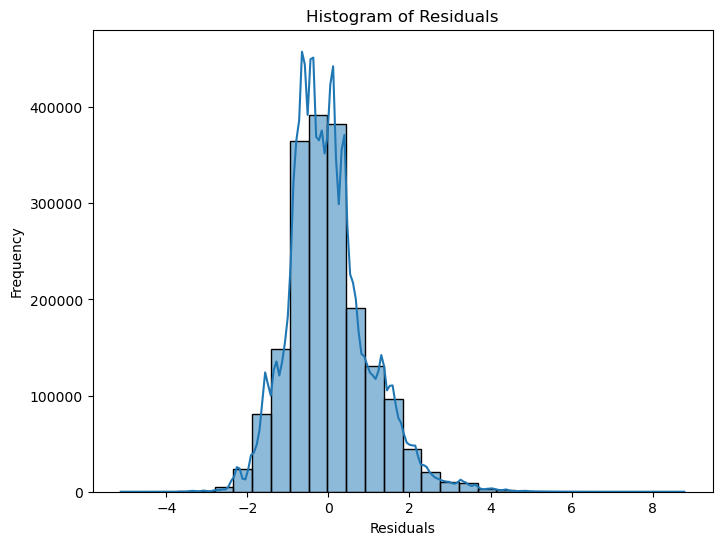

The skew of the residuals is: 0.7368385884908409


In [11]:
# Get the residuals
residuals = results_significant.resid


# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
print(f"The skew of the residuals is: {residuals.skew()}")

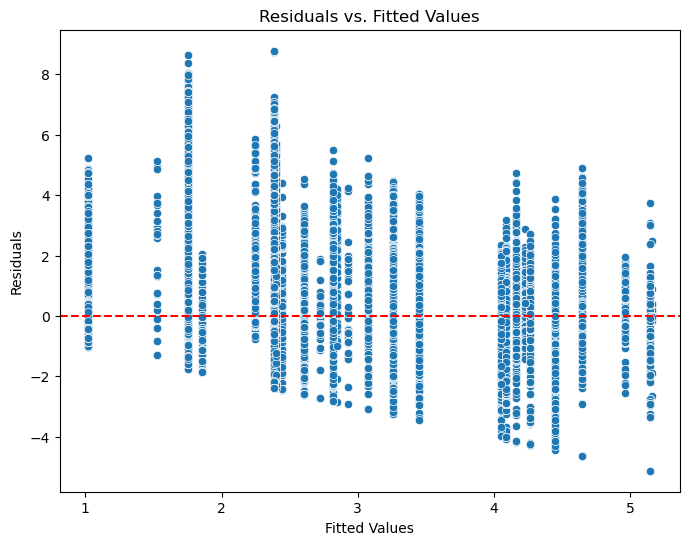

In [12]:
# Get fitted values
fitted_vals = results_significant.fittedvalues

# Scatter plot of residuals vs. fitted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


In [13]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Prepare the data for VIF calculation (drop the target variable and constant)
X_vif = regress_data.drop(['cost_per_item_log'], axis=1)

# Calculate VIF
vif_results = calculate_vif(X_vif)

# Display the results
print(vif_results)

         Feature  VIF
0   business_920  1.0
1   business_930  1.0
2   business_940  1.0
3   business_945  1.0
4   business_950  1.0
5   business_960  1.0
6   business_970  1.0
7   business_980  1.0
8   business_985  1.0
9   business_999  1.0
10  business_COM  1.0
11  business_DLT  1.0
12  business_EXL  1.0
13  business_FLD  1.0
14  business_HLB  1.0
15  business_IAE  1.0
16  business_IAI  1.0
17  business_LCP  1.0
18  business_LMP  1.0
19  business_OTH  1.0
20  business_PEN  1.0
21  business_RWY  1.0
22  business_SAE  1.0
23  business_SUR  1.0
24  business_TAL  1.0
25  business_TRO  1.0
26  business_URB  1.0


### Effect of Inventory Classification and Order Type on Quantity Ordered

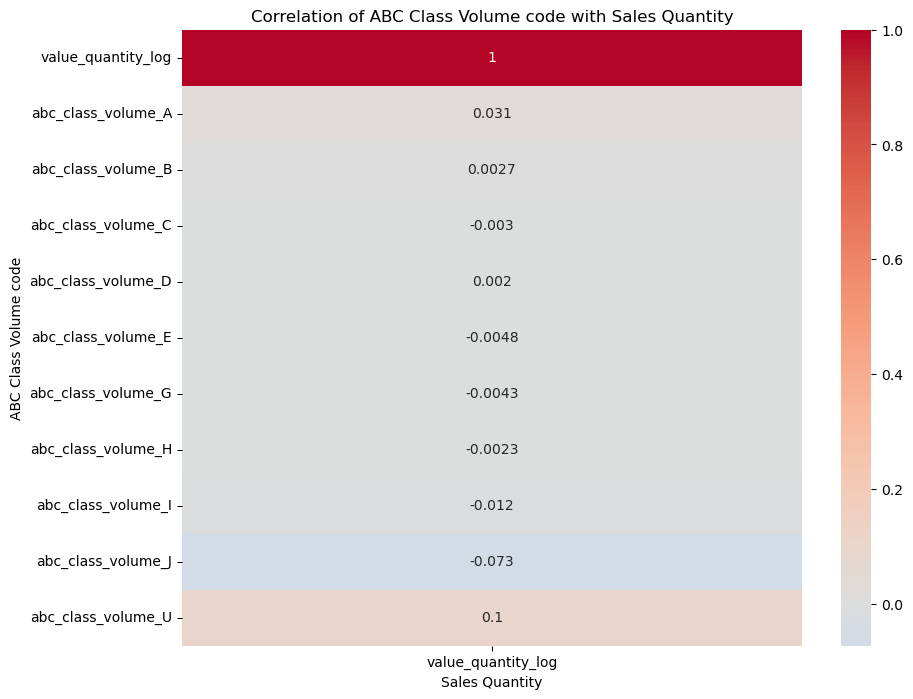

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

regress_df = df_combined[['abc_class_volume', 'value_quantity_log']]
# One-hot encode the 'abc_class_volume' column
df_encoded_business_area = pd.get_dummies(regress_df, columns=['abc_class_volume'])

# Calculate the correlation matrix
correlation_matrix_business_area = df_encoded_business_area.corr()

# Filter the correlation matrix to show only the correlations with 'value_quantity_log'
correlation_with_time_gap_business_area = correlation_matrix_business_area['value_quantity_log']

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_time_gap_business_area.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of ABC Class Volume code with Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('ABC Class Volume code')
plt.show()


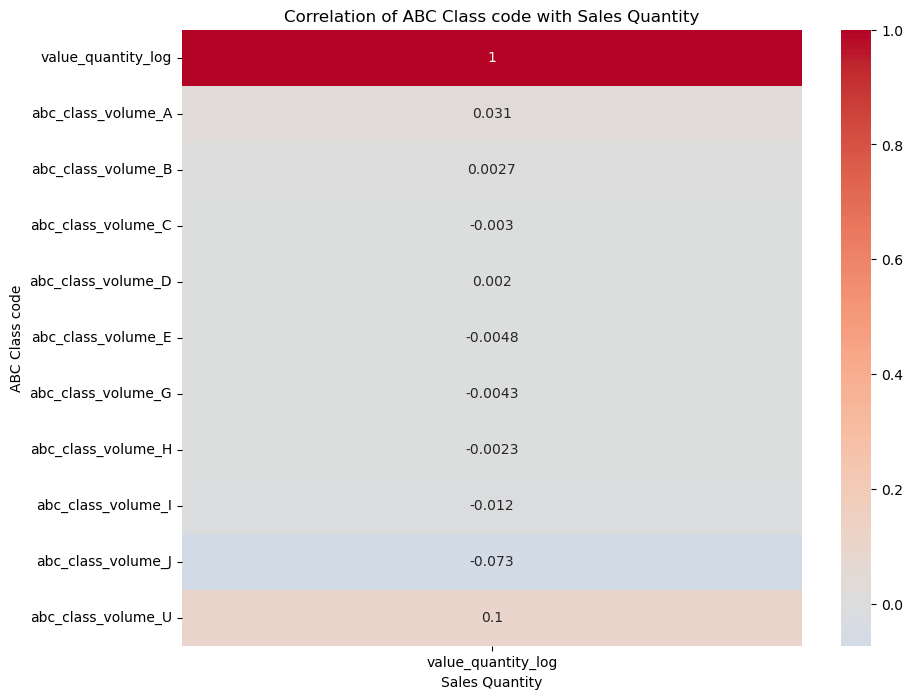

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

regress_df = df_combined[['abc_class_volume', 'value_quantity_log']]
# One-hot encode the 'business_area_code' column
df_encoded_business_area = pd.get_dummies(regress_df, columns=['abc_class_volume'])

# Calculate the correlation matrix
correlation_matrix_business_area = df_encoded_business_area.corr()

# Filter the correlation matrix to show only the correlations with 'time_gap'
correlation_with_time_gap_business_area = correlation_matrix_business_area['value_quantity_log']

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_time_gap_business_area.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of ABC Class code with Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('ABC Class code')
plt.show()


In [7]:
import statsmodels.api as sm

# One-hot encode categorical variables for abc_class_code and order_type_code
one_hot_abc_class = pd.get_dummies(df_combined['abc_class_volume'], prefix='abc', drop_first=True).astype(int)
one_hot_order_type = pd.get_dummies(df_combined['order_type_code'], prefix='order', drop_first=True).astype(int)

# Combine data for regression
regression_data = pd.concat([df_combined['value_quantity_log'], 
                             one_hot_abc_class, one_hot_order_type], axis=1)

# Step 4: Drop rows with NaN or infinite values in regression data
regression_data = regression_data.replace([np.inf, -np.inf], np.nan).dropna()

# Step 5: Split into X (independent variables) and y (dependent variable, i.e., value_quantity_log)
X = regression_data.drop('value_quantity_log', axis=1)
y = regression_data['value_quantity_log']

# Step 6: Remove columns with zero variance (if any)
X = X.loc[:, X.var() != 0]

# Step 7: Add constant for intercept
X = sm.add_constant(X)

# Step 8: Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Display model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:     value_quantity_log   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                 1.041e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:16:22   Log-Likelihood:            -2.9796e+06
No. Observations:             1953239   AIC:                         5.959e+06
Df Residuals:                 1953193   BIC:                         5.960e+06
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4099      0.043     32.873      0.0

In [8]:
# Step 1: Get significant predictors with p-value less than 0.05
significant_vars = results.pvalues[results.pvalues < 0.05].index.tolist()

# Step 2: Remove 'const' from the list if it's in there (since we add it separately in the model)
if 'const' in significant_vars:
    significant_vars.remove('const')

# Step 3: Select only the significant predictors from X for the new model
X_significant = X[significant_vars]

# Add constant to X_significant
X_significant = sm.add_constant(X_significant)

# Step 4: Fit the model with only the significant predictors
model_significant = sm.OLS(y, X_significant)
results_significant = model_significant.fit()

# Display summary of the new model
print(results_significant.summary())


                            OLS Regression Results                            
Dep. Variable:     value_quantity_log   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                 1.202e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:16:27   Log-Likelihood:            -2.9796e+06
No. Observations:             1953239   AIC:                         5.959e+06
Df Residuals:                 1953199   BIC:                         5.960e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3839      0.033     41.837      0.0

### Checking Assumption of Regression

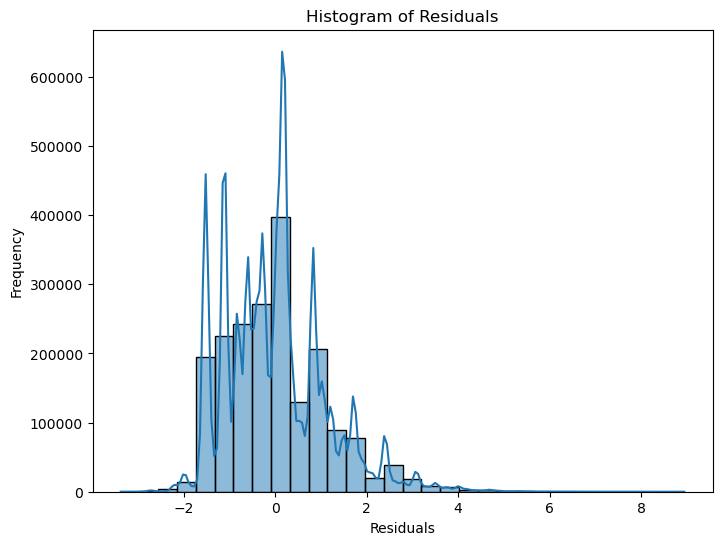

The skew of the residuals is: 0.8815271549032084


In [9]:
# Get the residuals
residuals = results_significant.resid


# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

print(f"The skew of the residuals is: {residuals.skew()}")

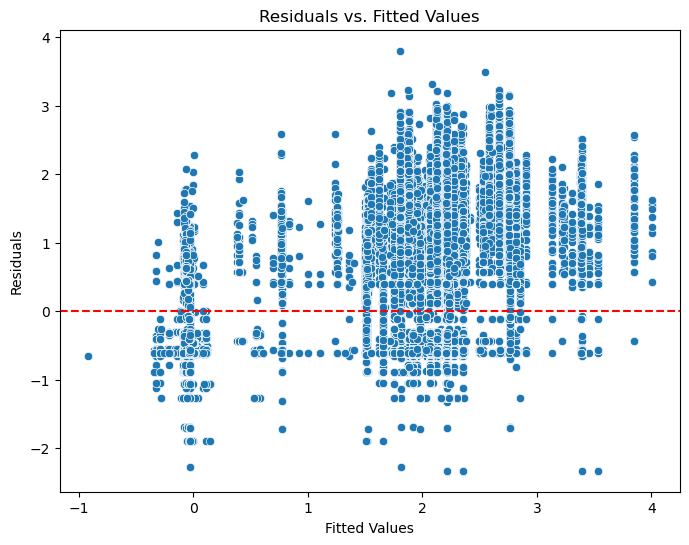

In [52]:
# Get fitted values
fitted_vals = results_significant.fittedvalues

# Scatter plot of residuals vs. fitted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Prepare the data for VIF calculation (drop the target variable and constant)
X_vif = regression_data.drop(['value_quantity_log'], axis=1)

# Calculate VIF
vif_results = calculate_vif(X_vif)

# Display the results
print(vif_results)

## Section 5: Prediction Model

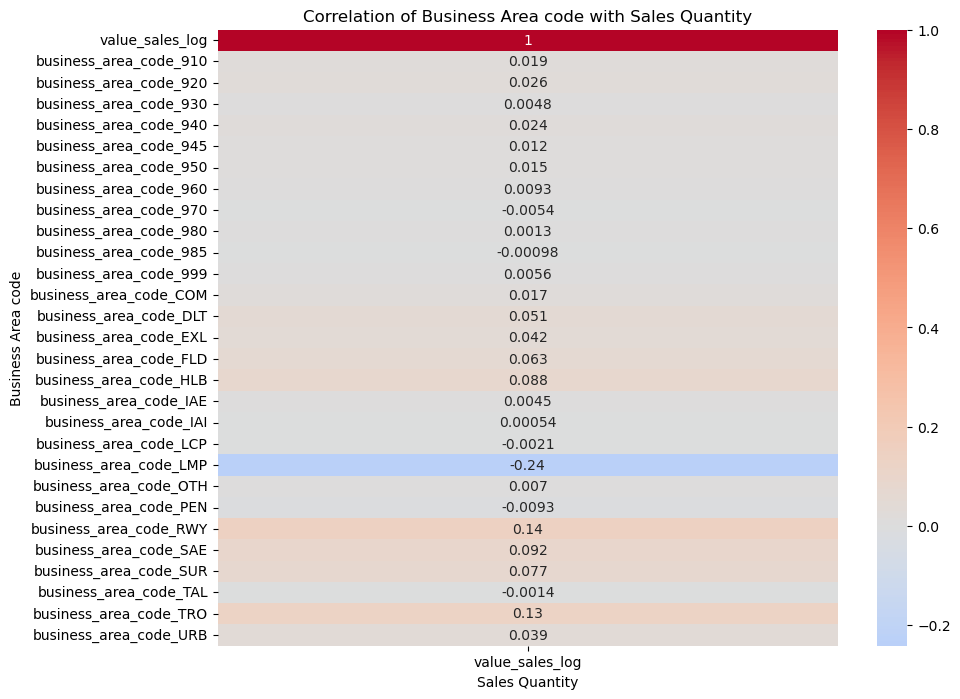

In [5]:
regress_df = df_combined[['business_area_code', 'value_sales_log']]
# One-hot encode the 'business_area_code' column
df_encoded_business_area = pd.get_dummies(regress_df, columns=['business_area_code'])

# Calculate the correlation matrix
correlation_matrix_business_area = df_encoded_business_area.corr()

# Filter the correlation matrix to show only the correlations with 'value_sales_log'
correlation_with_time_gap_business_area = correlation_matrix_business_area['value_sales_log']

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_time_gap_business_area.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Business Area code with Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('Business Area code')
plt.show()


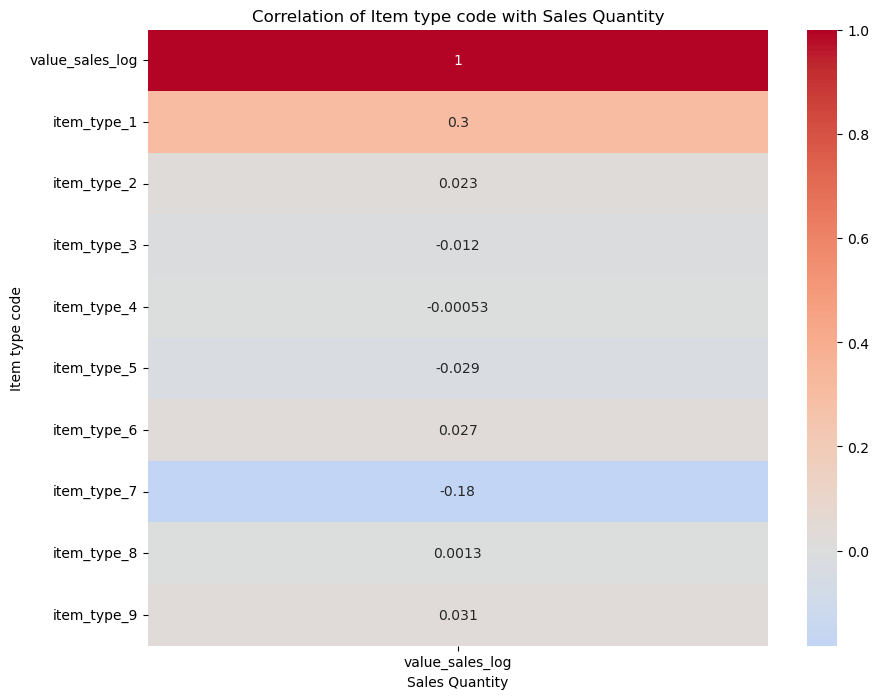

In [6]:
regress_df = df_combined[['item_type', 'value_sales_log']]
# One-hot encode the 'item_type' column
df_encoded_business_area = pd.get_dummies(regress_df, columns=['item_type'])

# Calculate the correlation matrix
correlation_matrix_business_area = df_encoded_business_area.corr()

# Filter the correlation matrix to show only the correlations with 'value_sales_log'
correlation_with_time_gap_business_area = correlation_matrix_business_area['value_sales_log']

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_time_gap_business_area.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Item type code with Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('Item type code')
plt.show()


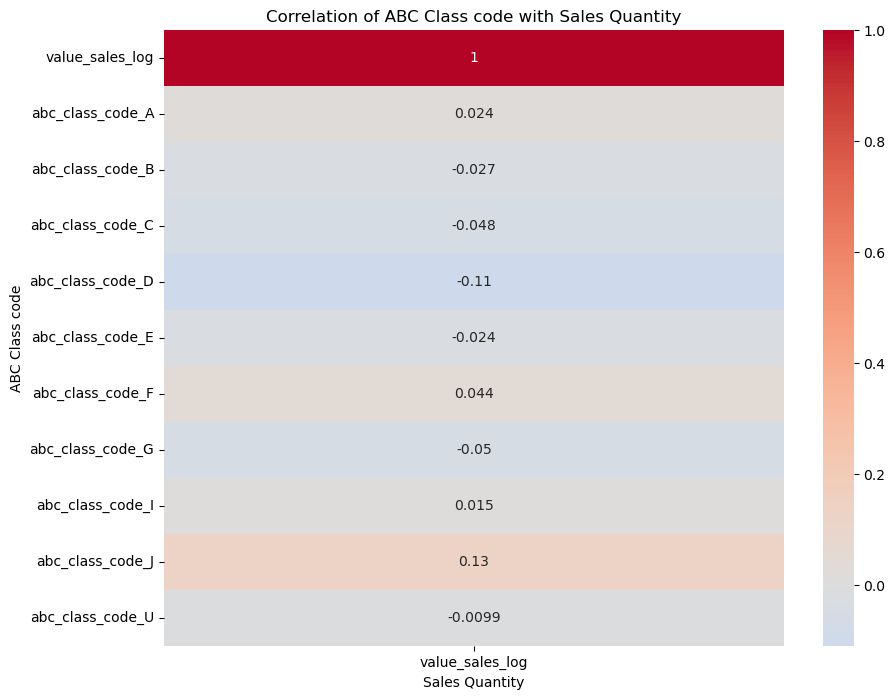

In [7]:
regress_df = df_combined[['abc_class_code', 'value_sales_log']]
# One-hot encode the 'abc_class_code' column
df_encoded_business_area = pd.get_dummies(regress_df, columns=['abc_class_code'])

# Calculate the correlation matrix
correlation_matrix_business_area = df_encoded_business_area.corr()

# Filter the correlation matrix to show only the correlations with 'value_sales_log'
correlation_with_time_gap_business_area = correlation_matrix_business_area['value_sales_log']

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_time_gap_business_area.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of ABC Class code with Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('ABC Class code')
plt.show()


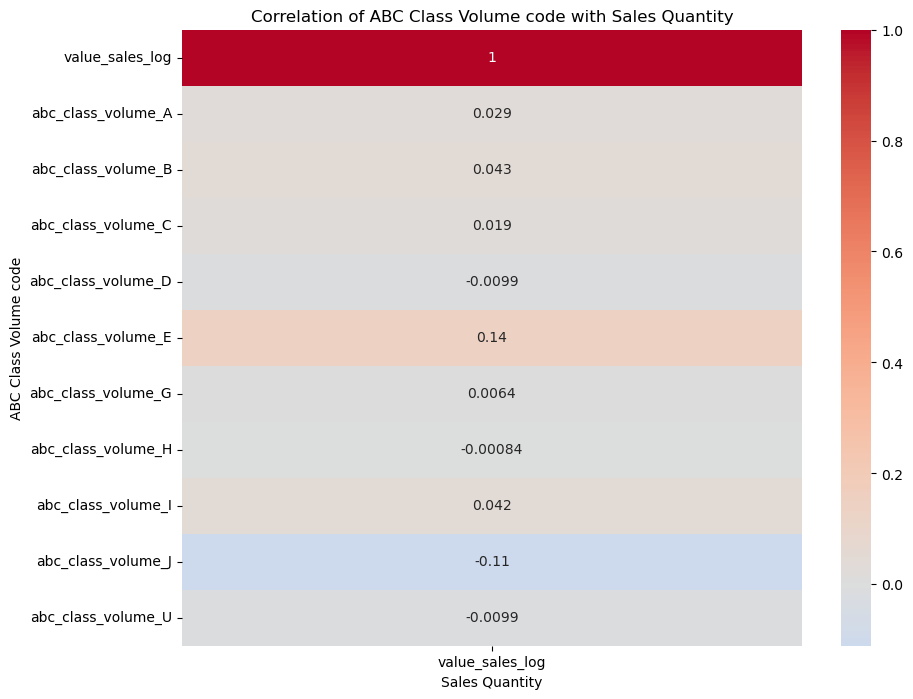

In [8]:
regress_df = df_combined[['abc_class_volume', 'value_sales_log']]
# One-hot encode the 'abc_class_volume' column
df_encoded_business_area = pd.get_dummies(regress_df, columns=['abc_class_volume'])

# Calculate the correlation matrix
correlation_matrix_business_area = df_encoded_business_area.corr()

# Filter the correlation matrix to show only the correlations with 'value_sales_log'
correlation_with_time_gap_business_area = correlation_matrix_business_area['value_sales_log']

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_time_gap_business_area.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of ABC Class Volume code with Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('ABC Class Volume code')
plt.show()


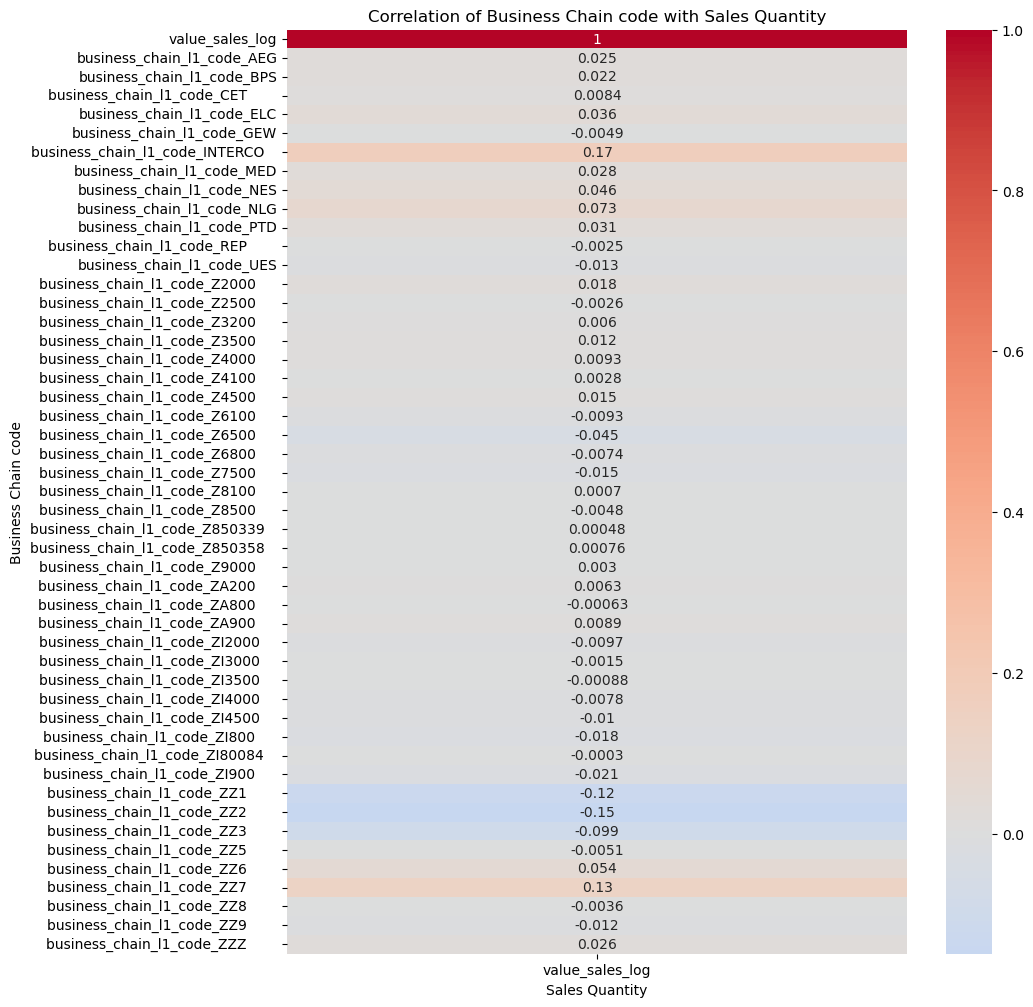

In [9]:
regress_df = df_combined[['business_chain_l1_code', 'value_sales_log']]
# One-hot encode the 'business_chain_l1_code' column
df_encoded_business_area = pd.get_dummies(regress_df, columns=['business_chain_l1_code'])

# Calculate the correlation matrix
correlation_matrix_business_area = df_encoded_business_area.corr()

# Filter the correlation matrix to show only the correlations with 'value_sales_log'
correlation_with_time_gap_business_area = correlation_matrix_business_area['value_sales_log']

# Plot the heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_with_time_gap_business_area.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Business Chain code with Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('Business Chain code')
plt.show()


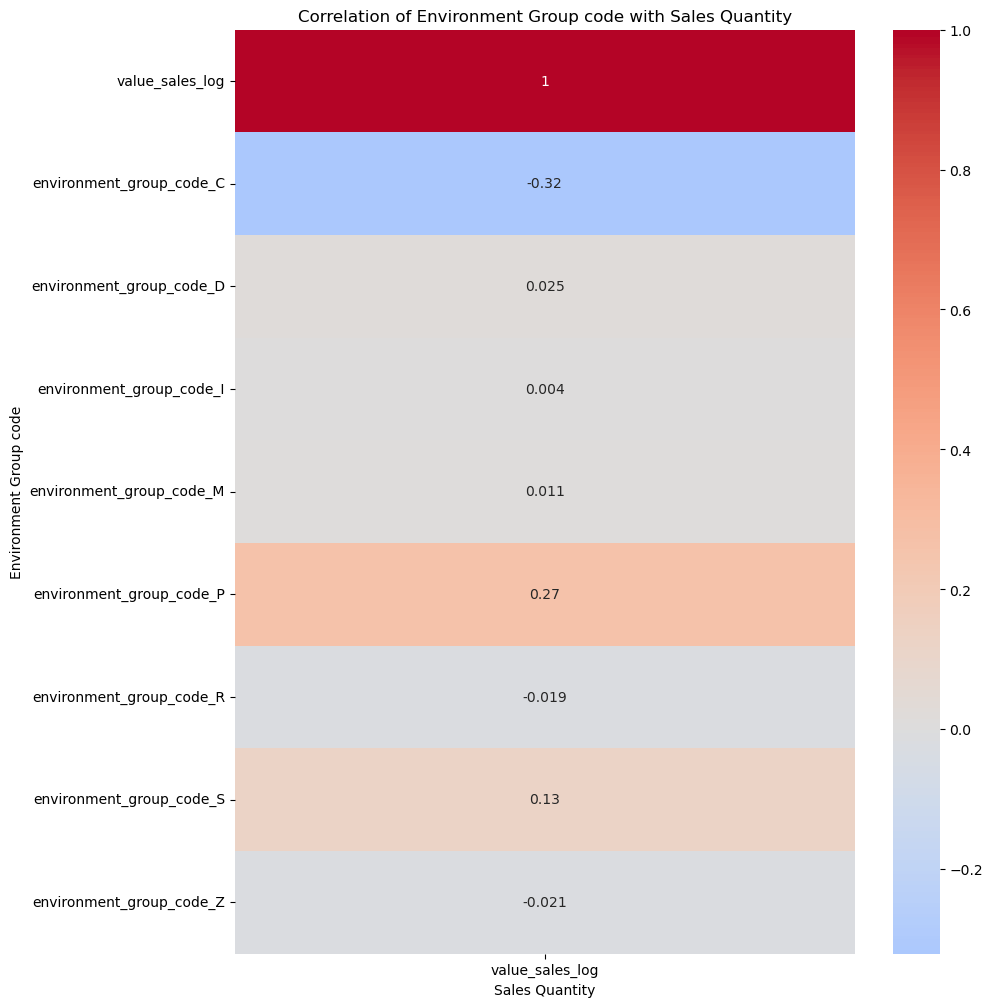

In [10]:
regress_df = df_combined[['environment_group_code', 'value_sales_log']]
# One-hot encode the 'environment_group_code' column
df_encoded_business_area = pd.get_dummies(regress_df, columns=['environment_group_code'])

# Calculate the correlation matrix
correlation_matrix_business_area = df_encoded_business_area.corr()

# Filter the correlation matrix to show only the correlations with 'value_sales_log'
correlation_with_time_gap_business_area = correlation_matrix_business_area['value_sales_log']

# Plot the heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_with_time_gap_business_area.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Environment Group code with Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('Environment Group code')
plt.show()


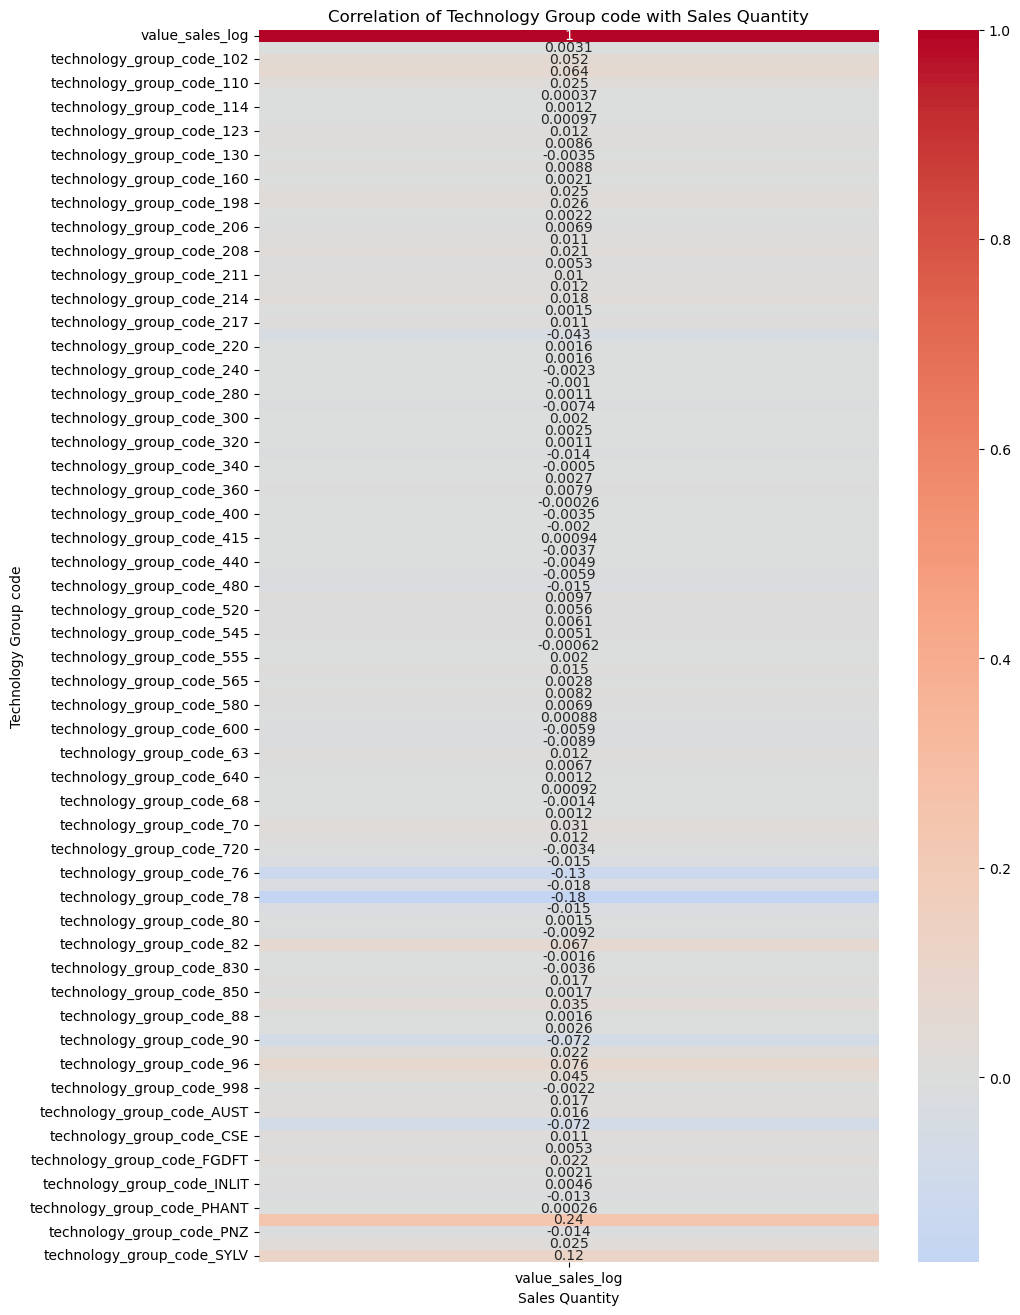

In [11]:
regress_df = df_combined[['technology_group_code', 'value_sales_log']]
# One-hot encode the 'technology_group_code' column
df_encoded_business_area = pd.get_dummies(regress_df, columns=['technology_group_code'])

# Calculate the correlation matrix
correlation_matrix_business_area = df_encoded_business_area.corr()

# Filter the correlation matrix to show only the correlations with 'value_sales_log'
correlation_with_time_gap_business_area = correlation_matrix_business_area['value_sales_log']

# Plot the heatmap
plt.figure(figsize=(10, 16))
sns.heatmap(correlation_with_time_gap_business_area.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Technology Group code with Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('Technology Group code')
plt.show()


In [12]:
import statsmodels.api as sm

# One-hot encode categorical variables for `abc_class_code` and `order_type_code`
one_hot_business_area = pd.get_dummies(df_combined['business_area_code'], prefix='business', drop_first=True).astype(int)
one_hot_item_type = pd.get_dummies(df_combined['item_type'], prefix='item', drop_first=True).astype(int)
one_hot_abc_class = pd.get_dummies(df_combined['abc_class_code'], prefix='abc', drop_first=True).astype(int)
one_hot_env = pd.get_dummies(df_combined['environment_group_code'], prefix='env', drop_first=True).astype(int)

# Combine data for regression, selecting relevant variables
regression_data = pd.concat([df_combined['value_sales_log'], 
                             one_hot_business_area, one_hot_item_type, one_hot_abc_class, one_hot_env], axis=1)

# Drop rows with NaN or infinite values in regression data
regression_data = regression_data.replace([np.inf, -np.inf], np.nan).dropna()

# Split into X (independent variables) and y (dependent variable, i.e., value_sales_log)
X = regression_data.drop('value_sales_log', axis=1)
y = regression_data['value_sales_log']

# Remove columns with zero variance (if any)
X = X.loc[:, X.var() != 0]

# Add constant for intercept
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Display model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        value_sales_log   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                 1.127e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:23:31   Log-Likelihood:            -3.6853e+06
No. Observations:             1953239   AIC:                         7.371e+06
Df Residuals:                 1953187   BIC:                         7.371e+06
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.9040      0.075     78.788   

In [13]:
# Step 1: Get significant predictors with p-value less than 0.05
significant_vars = results.pvalues[results.pvalues < 0.05].index.tolist()

# Step 2: Remove 'const' from the list if it's in there (since we add it separately in the model)
if 'const' in significant_vars:
    significant_vars.remove('const')

# Step 3: Select only the significant predictors from X for the new model
X_significant = X[significant_vars]

# Add constant to X_significant
X_significant = sm.add_constant(X_significant)

# Step 4: Fit the model with only the significant predictors
model_significant = sm.OLS(y, X_significant)
results_significant = model_significant.fit()

# Display summary of the new model
print(results_significant.summary())


                            OLS Regression Results                            
Dep. Variable:        value_sales_log   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                 1.222e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:23:38   Log-Likelihood:            -3.6853e+06
No. Observations:             1953239   AIC:                         7.371e+06
Df Residuals:                 1953191   BIC:                         7.371e+06
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.8949      0.036    161.642   

### Checking Assumptions of Regression

#### Normality Assumption

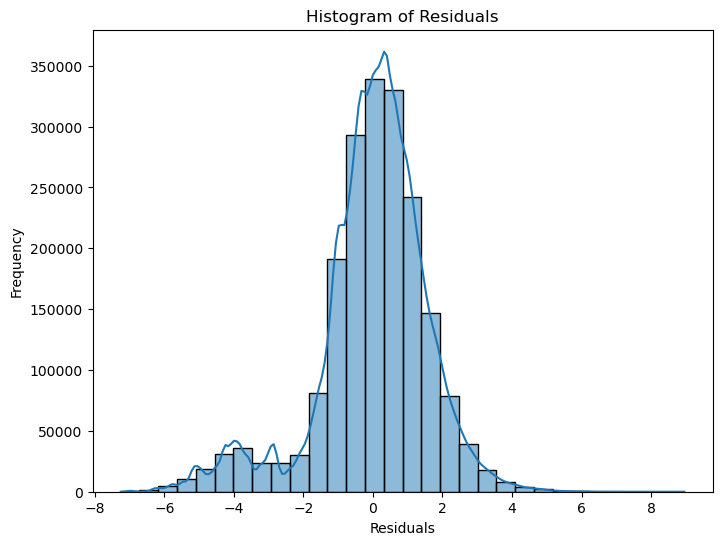

The skew of the residuals is: -0.8654443065618088


In [14]:
# Get the residuals
residuals = results_significant.resid


# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

print(f"The skew of the residuals is: {residuals.skew()}")

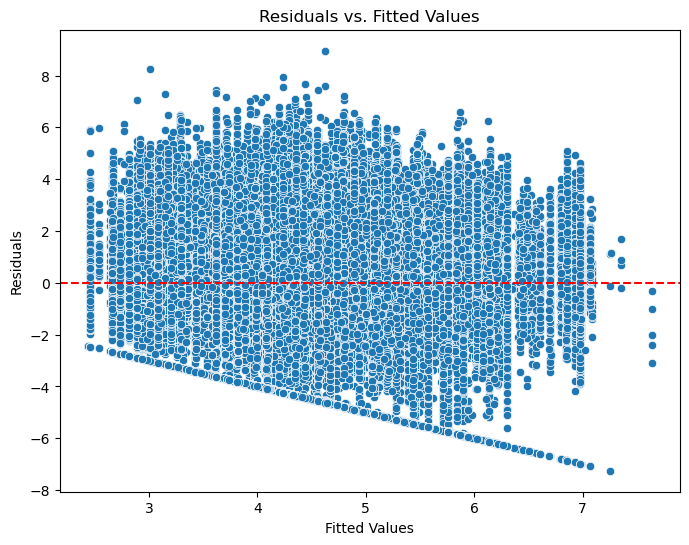

In [15]:
# Get fitted values
fitted_vals = results_significant.fittedvalues

# Scatter plot of residuals vs. fitted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


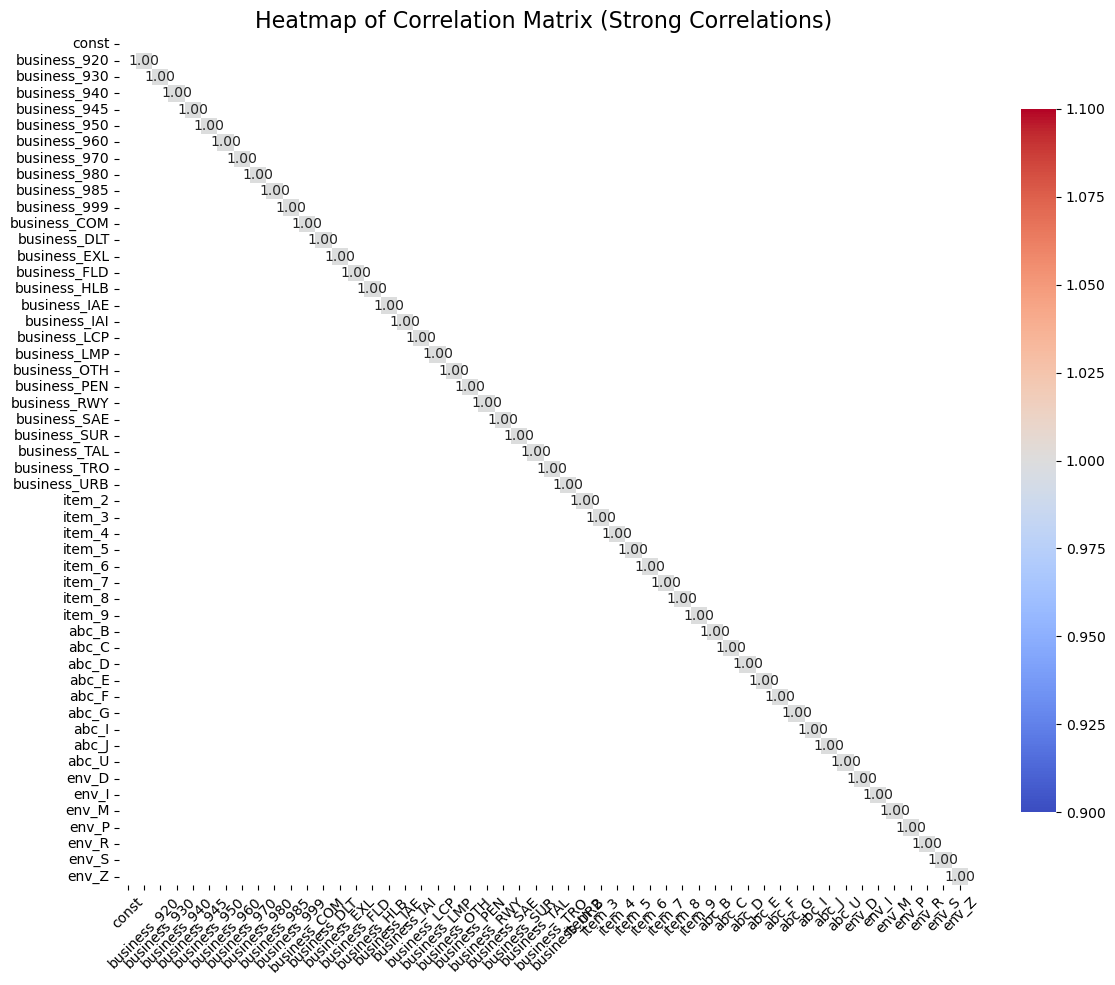

In [16]:
# Step 1: Compute the correlation matrix
correlation_matrix = X.corr()

# Step 2: Create a mask for the heatmap to display only strong correlations
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.abs(correlation_matrix) < 0.8] = True  # Mask out correlations that are not strong

# Step 3: Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Step 4: Draw the heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Step 5: Title and labels
plt.title('Heatmap of Correlation Matrix (Strong Correlations)', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [17]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Prepare the data for VIF calculation (drop the target variable and constant)
X_vif = regression_data.drop(['value_sales_log'], axis=1)

# Calculate VIF
vif_results = calculate_vif(X_vif)

# Display the results
print(vif_results)

         Feature        VIF
0   business_920   1.013699
1   business_930   1.000361
2   business_940   1.068266
3   business_945   1.003715
4   business_950   1.023055
5   business_960   1.001874
6   business_970   1.027513
7   business_980   1.050862
8   business_985   1.008969
9   business_999   1.020325
10  business_COM   4.327033
11  business_DLT   2.659826
12  business_EXL   1.035763
13  business_FLD   2.428889
14  business_HLB   1.166146
15  business_IAE   2.284186
16  business_IAI   3.879371
17  business_LCP   1.192907
18  business_LMP  14.908474
19  business_OTH   4.863688
20  business_PEN   1.161394
21  business_RWY   1.195022
22  business_SAE   1.555504
23  business_SUR   7.211662
24  business_TAL   1.389563
25  business_TRO   1.407665
26  business_URB   1.325130
27        item_2   1.091151
28        item_3   1.049913
29        item_4   1.288563
30        item_5   6.131259
31        item_6   3.623223
32        item_7  10.960519
33        item_8   1.110179
34        item_9   2

## Section 6: Customer Churn Analysis

In [5]:
# Ensure 'order_date' is in datetime format
df_combined['order_date'] = pd.to_datetime(df_combined['order_date'])

# Step 1: Extract year from 'order_date' and create a 'year' column
df_combined['year'] = df_combined['order_date'].dt.year

# Step 2: Create a set of unique customers for each year
customers_2012 = set(df_combined[df_combined['year'] == 2012]['customer_code'])
customers_2013 = set(df_combined[df_combined['year'] == 2013]['customer_code'])

# Step 3: Determine churn status
def determine_churn(customer_code):
    if customer_code in customers_2012 and customer_code in customers_2013:
        return 0  # Not churned
    else:
        return 1  # Churned

# Apply the function to create the 'is_churned' column
df_combined['is_churned'] = df_combined['customer_code'].apply(determine_churn)


In [6]:
# Filter out churned customers
churned_df = df_combined[df_combined['is_churned'] == 1]

# display the filtered DataFrame
churned_df


accounting_date  fiscal_year  fiscal_month  calendar_year  \
2012 719            20120216         2012             8           2012   
     720            20120509         2012            11           2012   
     721            20120522         2012            11           2012   
     722            20120120         2012             7           2012   
     723            20120608         2012            12           2012   
...                      ...          ...           ...            ...   
2013 935272         20131122         2014             5           2013   
     935273         20131125         2014             5           2013   
     935274         20131211         2014             6           2013   
     935277         20131128         2014             5           2013   
     935278         20130823         2014             2           2013   

             calendar_month  calendar_day  company_code customer_code  \
2012 719                  2            16           101     361000403   
     720                  5             9           101     361000403   
     721                  5            22           101     361000403   
     722                  1            20           101     361000403   
     723                  6             8           101     361000403   
...                     ...           ...           ...           ...   
2013 935272              11            22           950    Z20000039    
     935273              11            25           120     209900500   
     935274              12            11           120     209900500   
     935277              11            28           120     434790100   
     935278               8            23           120     434790100   

             customer_district_code                       item_code  ...  \
2012 719                        300  GENIE8WWWBC                     ...   
     720                        300  GENIE8WWWBC                     ...   
     721                        300  GENIE18WCDLBC                   ...   
     722                        300  GENIE14WWWES                    ...   
     723                        300  GENIE18WCDLBC                   ...   
...                             ...                             ...  ...   
2013 935272                     540                          239830  ...   
     935273                     200  CRYSTAR1                        ...   
     935274                     200  CRYSTAR1                        ...   
     935277                     720  DGLCSPECTRO350                  ...   
     935278                     720  DGLCSPECTRO350                  ...   

            dss_update_time   z_score value_sales_log  value_quantity_log  \
2012 719            49:58.7 -0.264695        3.670715            2.564949   
     720            49:58.7 -0.262402        3.718438            2.564949   
     721            49:58.7 -0.262402        3.718438            2.564949   
     722            49:58.7 -0.287555        3.002708            1.945910   
     723            49:58.7 -0.286408        3.049273            1.945910   
...                     ...       ...             ...                 ...   
2013 935272         49:58.7 -0.707107        3.828641            0.693147   
     935273         49:58.7  0.707107        8.414584            4.304065   
     935274         49:58.7 -0.707107        6.428105            2.397895   
     935277         49:58.7  0.707107        7.378384            0.693147   
     935278         49:58.7 -0.707107        7.346655            0.693147   

            value_cost_log time_gap profit_margin adjusted_sales  year  \
2012 719          3.275513        0     33.498433          38.28  2012   
     720          3.275513        1     36.674627          40.20  2012   
     721          3.275513        1     36.674627          40.20  2012   
     722          2.619467        1     33.498433          19.14  2012   
     723          2.619467        1    

In [7]:
import statsmodels.api as sm
# Use one-hot encoding for categorical variables
one_hot_business_area = pd.get_dummies(df_combined['business_area_code'], prefix='business', drop_first=True).astype(int)
one_hot_env = pd.get_dummies(df_combined['environment_group_code'], prefix='env', drop_first=True).astype(int)
one_hot_district = pd.get_dummies(df_combined['customer_district_code'], prefix='district', drop_first=True).astype(int)

# Step 3: Combine data for logistic regression, selecting relevant variables
logistic_data = pd.concat([df_combined['is_churned'], 
                            df_combined['value_sales_log'],  # Include value_sales_log here
                            one_hot_business_area, 
                            one_hot_env,
                            one_hot_district], axis=1)

# Drop rows with NaN or infinite values in logistic data
logistic_data = logistic_data.replace([np.inf, -np.inf], np.nan).dropna()

# Split into X (independent variables) and y (dependent variable, i.e., is_churned)
X = logistic_data.drop('is_churned', axis=1)
y = logistic_data['is_churned']

# Add constant for intercept
X = sm.add_constant(X)

# Optionally drop highly correlated features if necessary
# X = X.drop(['column_name_to_drop'], axis=1)  # Example

# Fit the logistic regression model without weights
try:
    logistic_model = sm.Logit(y, X)
    logistic_results = logistic_model.fit(maxiter=100)  # Increase max iterations if needed
    # Step 9: Display the model summary
    print(logistic_results.summary())
except Exception as e:
    print(f"An error occurred: {e}")

Optimization terminated successfully.
         Current function value: 0.485326
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             is_churned   No. Observations:              1953239
Model:                          Logit   Df Residuals:                  1953188
Method:                           MLE   Df Model:                           50
Date:                Wed, 06 Nov 2024   Pseudo R-squ.:                 0.03055
Time:                        02:35:56   Log-Likelihood:            -9.4796e+05
converged:                       True   LL-Null:                   -9.7783e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4190      0.110    -12.957      0.000      -1.634      -1.204
value_sales_lo

In [8]:
# Step 1: Create a DataFrame from the model summary
summary_df = pd.DataFrame({
    'coef': logistic_results.params,
    'p-value': logistic_results.pvalues
})

# Step 2: Filter out variables with p-value greater than 0.05
significant_vars = summary_df[summary_df['p-value'] <= 0.05].index.tolist()

# Step 3: Create the new design matrix X with only significant variables
X_significant = X[significant_vars]

# Step 4: Add constant for intercept
X_significant = sm.add_constant(X_significant)

# Step 5: Fit the new logistic regression model with significant variables
model_significant = sm.Logit(y, X_significant)
results_significant = model_significant.fit()

# Step 6: Display the summary of the new model
print(results_significant.summary())

Optimization terminated successfully.
         Current function value: 0.485758
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             is_churned   No. Observations:              1953239
Model:                          Logit   Df Residuals:                  1953205
Method:                           MLE   Df Model:                           33
Date:                Wed, 06 Nov 2024   Pseudo R-squ.:                 0.02969
Time:                        02:36:07   Log-Likelihood:            -9.4880e+05
converged:                       True   LL-Null:                   -9.7783e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4135      0.006   -246.464      0.000      -1.425      -1.402
value_sales_lo

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Step 1: Split the data into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X_significant, y, test_size=0.3, random_state=142)

# Step 2: Fit the model on the training data
model_significant = sm.Logit(y_train, sm.add_constant(X_train))
results_significant = model_significant.fit()

# Step 3: Make predictions on the test set
y_pred_probs = results_significant.predict(sm.add_constant(X_test))  # Predicted probabilities
y_pred = (y_pred_probs >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Step 4: Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 5: Display the performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Optimization terminated successfully.
         Current function value: 0.485582
         Iterations 7
Accuracy: 0.8001
Precision: 0.5644
Recall: 0.0130
F1 Score: 0.0255
ROC AUC Score: 0.6120
Confusion Matrix:
[[467306   1183]
 [115950   1533]]


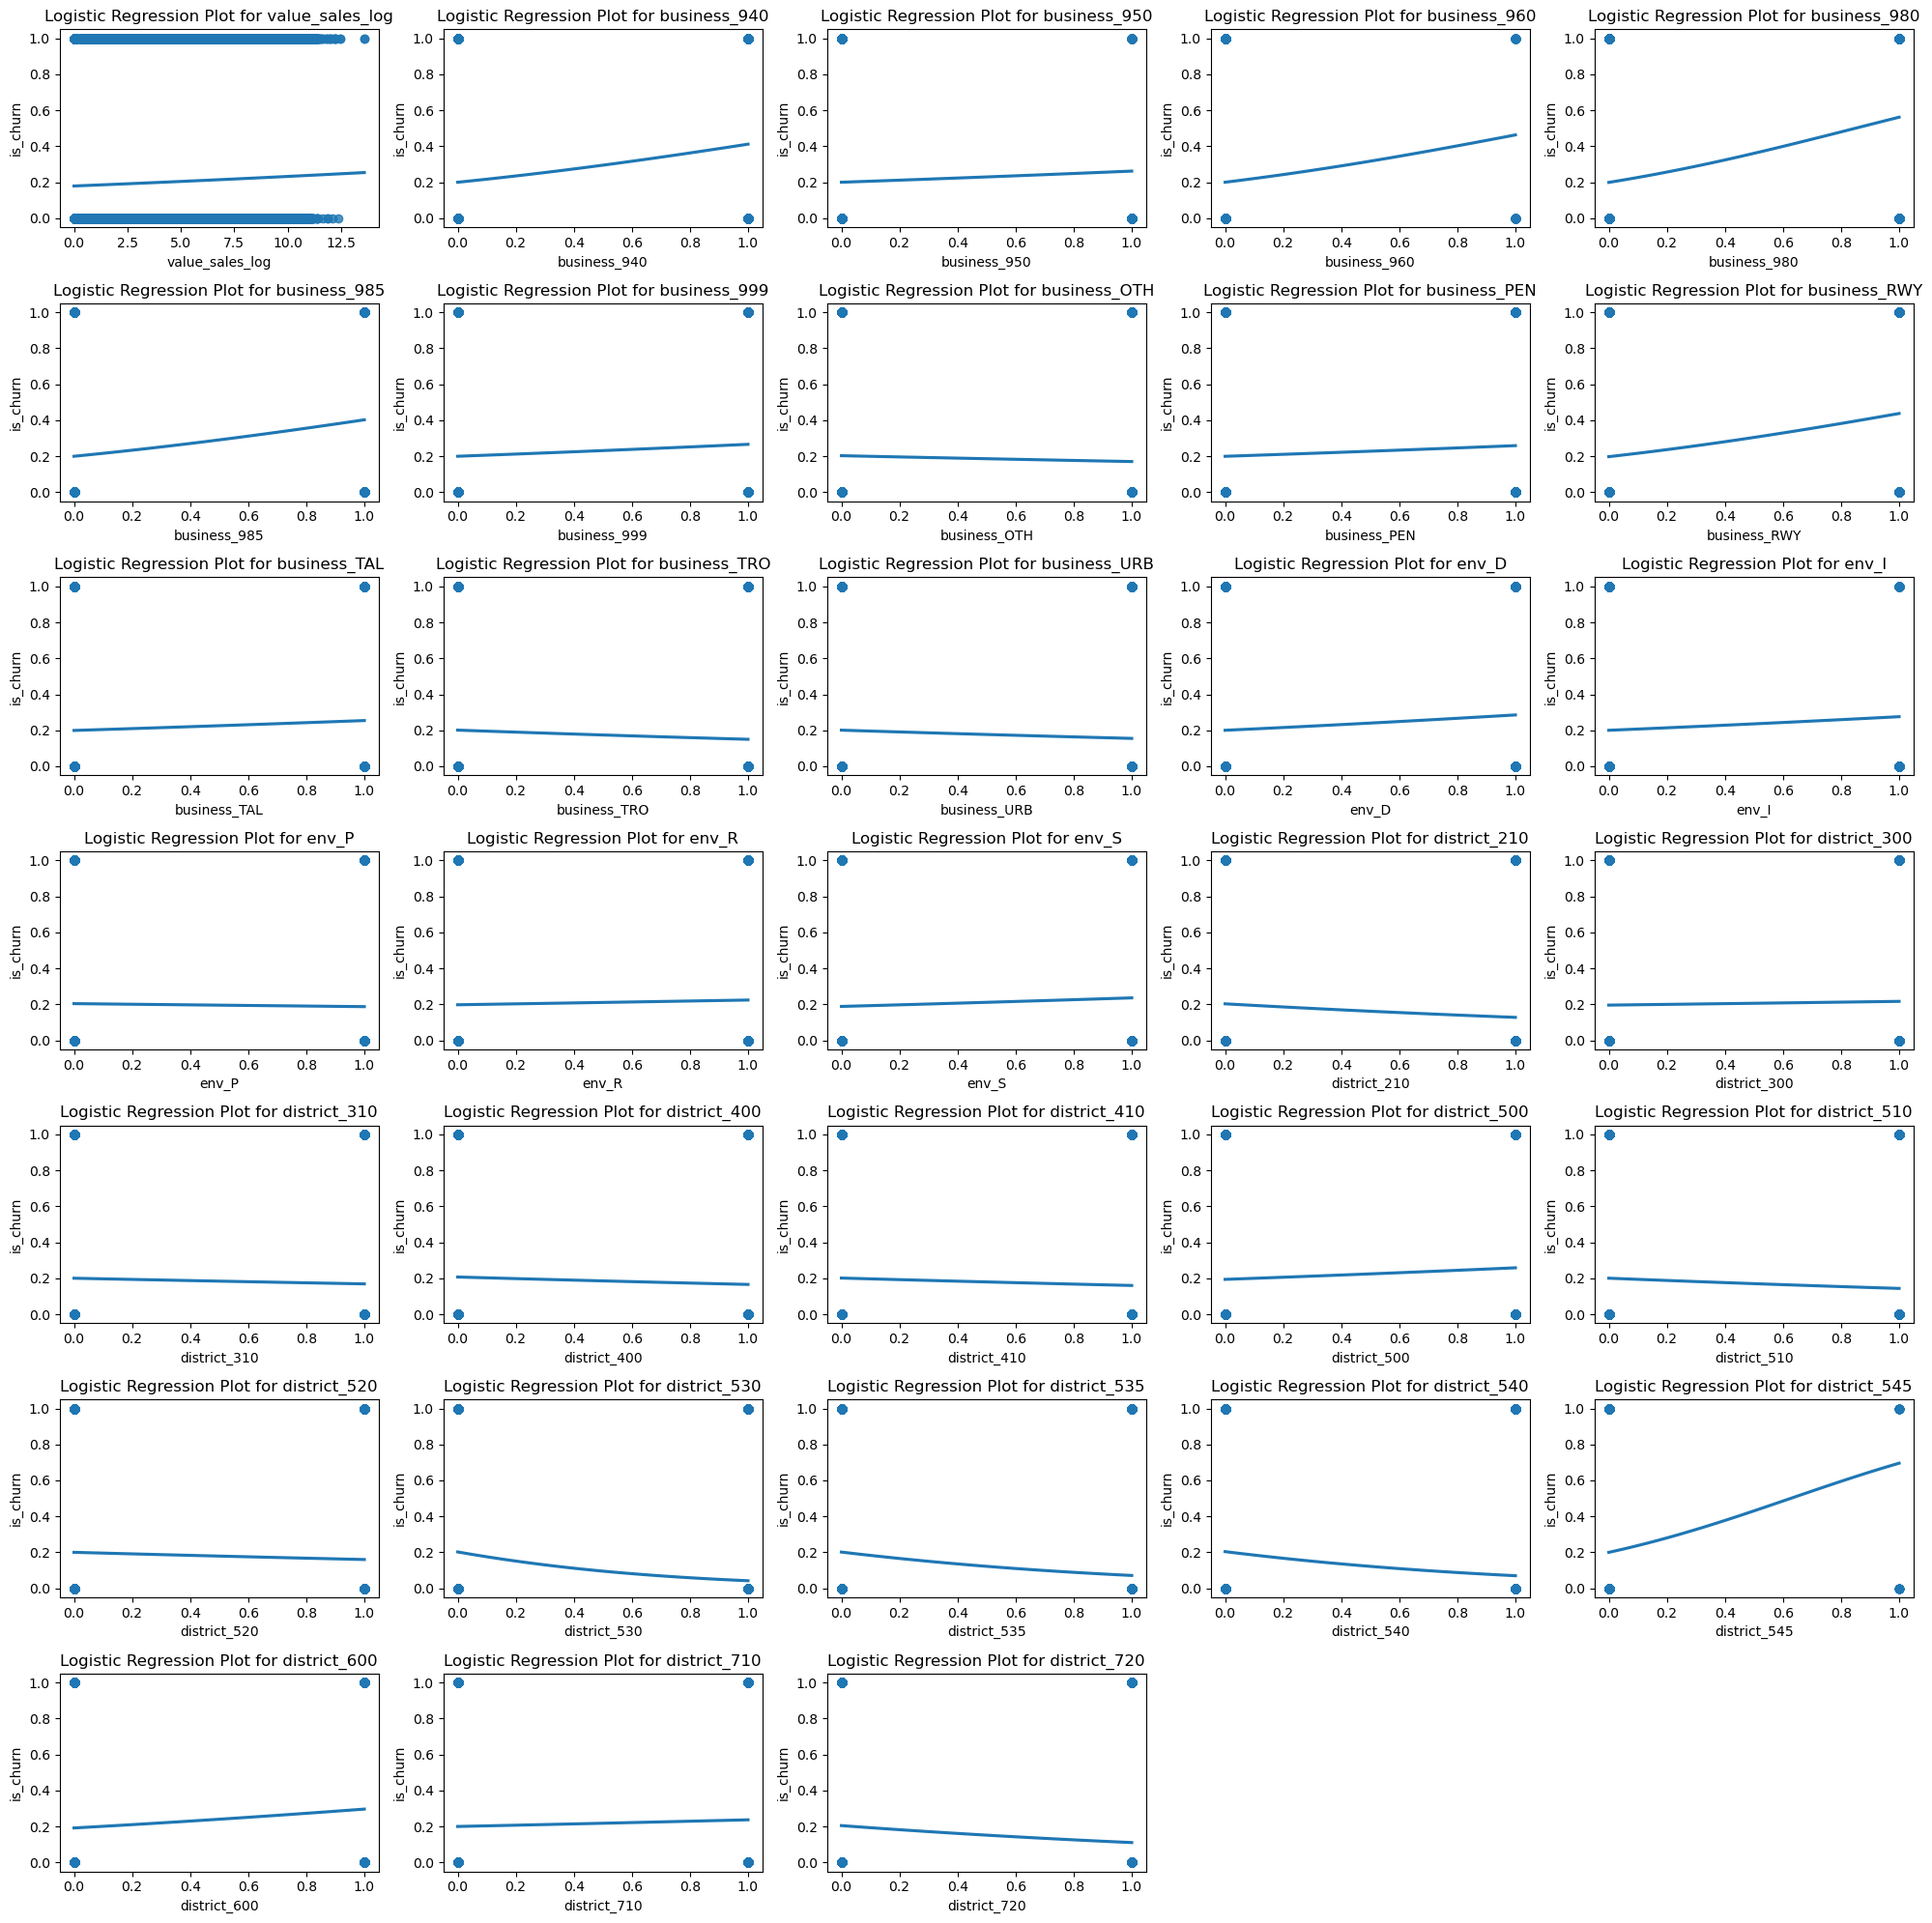

In [10]:
# Define the features to check
features_to_check = X_significant.columns[1:]  # Exclude the constant

# Create a figure for subplots
plt.figure(figsize=(20, 20))

# Create plots for each feature
for i in range(len(features_to_check)):
    plt.subplot(7, 5, i + 1)  # Adjusting index for subplot
    sns.regplot(x=logistic_data[features_to_check[i]], y=y, logistic=True, ci=None)
    plt.title(f'Logistic Regression Plot for {features_to_check[i]}')
    plt.xlabel(features_to_check[i])
    plt.ylabel('is_churn')

# Show all subplots at once
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Prepare the data for VIF calculation (drop the target variable and constant)
X_vif = logistic_data.drop(['is_churned'], axis=1)

# Calculate VIF
vif_results = calculate_vif(X_vif)

# Display the results
print(vif_results)


            Feature       VIF
0   value_sales_log  7.771623
1      business_920  1.009169
2      business_930  1.000398
3      business_940  1.055085
4      business_945  1.002355
5      business_950  1.022259
6      business_960  1.001643
7      business_970  1.007175
8      business_980  1.034565
9      business_985  1.003859
10     business_999  1.006200
11     business_COM  2.198762
12     business_DLT  1.586824
13     business_EXL  1.023747
14     business_FLD  1.535534
15     business_HLB  1.160874
16     business_IAE  2.283831
17     business_IAI  3.876391
18     business_LCP  1.114859
19     business_LMP  4.400710
20     business_OTH  2.175349
21     business_PEN  1.043317
22     business_RWY  1.216088
23     business_SAE  1.290758
24     business_SUR  3.606535
25     business_TAL  1.146782
26     business_TRO  1.353246
27     business_URB  1.162329
28            env_D  1.089597
29            env_I  5.169290
30            env_M  1.065308
31            env_P  2.251321
32        